In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_excel("/content/NEAR_token_transaction_data.xlsx")

In [ ]:
df.sample(10)

Transaction Hash   Blockno  \
557    0x40d3c888986092edfcb63c85be635b5ce4d15b734a31...  18958675   
5009   0x1dd32563aa2533908132f076b4ea9a8a2969be711663...  19465450   
4088   0x1f483fa9b733e65413f237d29d4651aa52efa84758f9...  19432949   
11881  0x17c632ce620581efea7eaee0d9643ea3149daaf67261...  19815866   
4497   0xff604103fd658532994b6a1a34c0f9e6540cf2dfaf52...  19449450   
9405   0x793115e00d0e2409375f740dbeabbc72150588ca3eca...  19711102   
17987  0xa8644ef1478da9bb592869f2c88814895c7c31e6daf7...  20093177   
19037  0x544006cef7b4db0120a3826d18b4f0e4c666d26dce9c...  20139308   
18854  0xddfd92b18557eca0f34ca68f56eab49b942424959925...  20131037   
5674   0x5ec58db9e243b394f847994a9a2d88267bf67057fe77...  19507812   

       UnixTimestamp      DateTime (UTC)  \
557       1704672659 2024-01-08 00:10:59   
5009      1710810695 2024-03-19 01:11:35   
4088      1710415667 2024-03-14 11:27:47   
11881     1715056787 2024-05-07 04:39:47   
4497      1710616367 2024-03-16 19:12:47   
9405      1713790847 2024-04-22 13:00:47   
17987     1718405855 2024-06-14 22:57:35   
19037     1718963411 2024-06-21 09:50:11   
18854     1718863511 2024-06-20 06:05:11   
5674      1711324763 2024-03-24 23:59:23   

                                             From  \
557    0xce29c85c5a4fc2fa5cc4f681d4d1527a656ba399   
5009   0xe37e799d5077682fa0a244d46e5649f71457bd09   
4088   0x6469b34a2a4723163c4902dbbdea728d20693c12   
11881  0x22f9dcf4647084d6c31b2765f6910cd85c178c18   
4497   0x983dfba1c0724786598af0e63a9a6f94aabd24a1   
9405   0xe37e799d5077682fa0a244d46e5649f71457bd09   
17987  0x6469b34a2a4723163c4902dbbdea728d20693c12   
19037  0x983dfba1c0724786598af0e63a9a6f94aabd24a1   
18854  0xee8aaa362a75fbf8e0a38a50ddc27f38551e16ea   
5674   0x6469b34a2a4723163c4902dbbdea728d20693c12   

                                               To    Quantity           Method  
557    0x53118f0951f8ae1a5e797aacbcba03a149774797    0.005521          Execute  
5009   0x6469b34a2a4723163c4902dbbdea728d20693c12   49.151350             Swap  
4088   0xf768bf37559b5425710e0d1bd58b1b4ae3d0c175   15.780702  Sell To Uniswap  
11881  0x382ffce2287252f930e1c8dc9328dac5bf282ba1    0.073346       0x415565b0  
4497   0x95c4f5b83aa70810d4f142d58e5f7242bd891cb0    0.055717             Swap  
9405   0x382ffce2287252f930e1c8dc9328dac5bf282ba1    8.488683             Swap  
17987  0x4736b02db015dcd1a57a69c889d073b100000000  129.546490                -  
19037  0x111111125421ca6dc452d289314280a0f8842a65  281.460859             Swap  
18854  0xbc6a5cfcf24eacda3c25c042494ef21b77165738  580.385516          Unoswap  
5674   0x9dddbaf43975c1c2c55a51fb337b8cab3840954f    3.842457  Sell To Uniswap

In [ ]:
df.shape

(19836, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19836 entries, 0 to 19835
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction Hash  19836 non-null  object        
 1   Blockno           19836 non-null  int64         
 2   UnixTimestamp     19836 non-null  int64         
 3   DateTime (UTC)    19836 non-null  datetime64[ns]
 4   From              19836 non-null  object        
 5   To                19836 non-null  object        
 6   Quantity          19836 non-null  float64       
 7   Method            19836 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 1.2+ MB


In [ ]:
df.columns

Index(['Transaction Hash', 'Blockno', 'UnixTimestamp', 'DateTime (UTC)',
       'From', 'To', 'Quantity', 'Method'],
      dtype='object')

In [ ]:
df.describe().T

count                           mean                  min  \
Blockno         19836.0                19684408.376084           18909018.0   
UnixTimestamp   19836.0              1713462542.953418         1704068735.0   
DateTime (UTC)    19836  2024-04-18 17:49:02.953417984  2024-01-01 00:25:35   
Quantity        19836.0                     377.944387                  0.0   

                                25%                  50%                  75%  \
Blockno                  19465974.0           19736657.5           19937545.0   
UnixTimestamp          1710817115.0         1714099703.0         1716527195.0   
DateTime (UTC)  2024-03-19 02:58:35  2024-04-26 02:48:23  2024-05-24 05:06:35   
Quantity                    3.21358            72.444861           293.678666   

                                max             std  
Blockno                  20171862.0   322060.528145  
UnixTimestamp          1719356675.0  3898955.715296  
DateTime (UTC)  2024-06-25 23:04:35             NaN  
Quantity                   750000.0     8007.345063

In [ ]:
df.isna().sum()

Transaction Hash    0
Blockno             0
UnixTimestamp       0
DateTime (UTC)      0
From                0
To                  0
Quantity            0
Method              0
dtype: int64

In [ ]:
df.duplicated().sum()

7

In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
df.duplicated().sum().any()

False

In [ ]:
col = df.columns

In [ ]:
for i in col:
  print(i,df[i].nunique())

Transaction Hash 9787
Blockno 8427
UnixTimestamp 8427
DateTime (UTC) 8427
From 1823
To 3273
Quantity 13329
Method 88


In [ ]:
df['Method'].value_counts()

Method
Swap                        9427
0x415565b0                  3281
-                           2562
Execute                     1030
Sell To Uniswap              759
                            ... 
Withdraw                       1
Sell Shares                    1
Buy On Uniswap V2Fork          1
I Bribe2Much Z7650399733       1
Unoswap3                       1
Name: count, Length: 88, dtype: int64

In [ ]:
df[df["Method"] == "-"]

Transaction Hash   Blockno  \
17     0xcbdf5829343c8c9e4e5d550fe33ad30f65bd3cbe5f4b...  18912572   
18     0xcbdf5829343c8c9e4e5d550fe33ad30f65bd3cbe5f4b...  18912572   
22     0x8dfe34096162408e7a8ab9327d77a34a9cd1548c3582...  18912572   
23     0xfc9c8f973df31951d03dfaca3a08dec4c5ab540c6eac...  18912669   
26     0x9a57adfe813708c9180b14dabcc08ab1dcc55505d7fe...  18912669   
...                                                  ...       ...   
19803  0x1006c157a9fa8090ac55211caccb84d8675a8ccd10ab...  20170530   
19804  0x1006c157a9fa8090ac55211caccb84d8675a8ccd10ab...  20170530   
19819  0xb7e518331240b801ecb7e0aec18fded73fcd9cb87b0e...  20171393   
19820  0xb7e518331240b801ecb7e0aec18fded73fcd9cb87b0e...  20171393   
19832  0xe6b3867b6a620644689ba43af59f3b3e0eade9c4d764...  20171862   

       UnixTimestamp      DateTime (UTC)  \
17        1704111995 2024-01-01 12:26:35   
18        1704111995 2024-01-01 12:26:35   
22        1704111995 2024-01-01 12:26:35   
23        1704113195 2024-01-01 12:46:35   
26        1704113195 2024-01-01 12:46:35   
...              ...                 ...   
19803     1719340607 2024-06-25 18:36:47   
19804     1719340607 2024-06-25 18:36:47   
19819     1719351035 2024-06-25 21:30:35   
19820     1719351035 2024-06-25 21:30:35   
19832     1719356675 2024-06-25 23:04:35   

                                             From  \
17     0x983dfba1c0724786598af0e63a9a6f94aabd24a1   
18     0x983dfba1c0724786598af0e63a9a6f94aabd24a1   
22     0xa6381631e0634e97e23a80a3c57f9582aa959e16   
23     0x6469b34a2a4723163c4902dbbdea728d20693c12   
26     0x983dfba1c0724786598af0e63a9a6f94aabd24a1   
...                                           ...   
19803  0x8d8404f8cca4c8834ca3cab1e54887ae47724bee   
19804  0x8d8404f8cca4c8834ca3cab1e54887ae47724bee   
19819  0xee8aaa362a75fbf8e0a38a50ddc27f38551e16ea   
19820  0x5b93d80da1a359340d1f339fb574bdc56763f995   
19832  0x6469b34a2a4723163c4902dbbdea728d20693c12   

                                               To    Quantity Method  
17     0xa6381631e0634e97e23a80a3c57f9582aa959e16  688.722579      -  
18     0x95c4f5b83aa70810d4f142d58e5f7242bd891cb0    0.518486      -  
22     0x983dfba1c0724786598af0e63a9a6f94aabd24a1  688.722579      -  
23     0x983dfba1c0724786598af0e63a9a6f94aabd24a1  689.054661      -  
26     0x6469b34a2a4723163c4902dbbdea728d20693c12  701.284301      -  
...                                           ...         ...    ...  
19803  0x983dfba1c0724786598af0e63a9a6f94aabd24a1  232.050000      -  
19804  0xee8aaa362a75fbf8e0a38a50ddc27f38551e16ea  232.050000      -  
19819  0x5b93d80da1a359340d1f339fb574bdc56763f995   55.349356      -  
19820  0xdd66ca5783bc6cda04d73ded6bf692f5d3a03d8d   55.349356      -  
19832  0xee8aaa362a75fbf8e0a38a50ddc27f38551e16ea   81.711825      -  

[2562 rows x 8 columns]

In [ ]:
## Replacing "-" value with "Unknown"

df["Method"] = df["Method"].apply(lambda x: x.replace("-","Unknown"))

In [ ]:
df[df["Method"] == "Unknown"]

Transaction Hash   Blockno  \
17     0xcbdf5829343c8c9e4e5d550fe33ad30f65bd3cbe5f4b...  18912572   
18     0xcbdf5829343c8c9e4e5d550fe33ad30f65bd3cbe5f4b...  18912572   
22     0x8dfe34096162408e7a8ab9327d77a34a9cd1548c3582...  18912572   
23     0xfc9c8f973df31951d03dfaca3a08dec4c5ab540c6eac...  18912669   
26     0x9a57adfe813708c9180b14dabcc08ab1dcc55505d7fe...  18912669   
...                                                  ...       ...   
19803  0x1006c157a9fa8090ac55211caccb84d8675a8ccd10ab...  20170530   
19804  0x1006c157a9fa8090ac55211caccb84d8675a8ccd10ab...  20170530   
19819  0xb7e518331240b801ecb7e0aec18fded73fcd9cb87b0e...  20171393   
19820  0xb7e518331240b801ecb7e0aec18fded73fcd9cb87b0e...  20171393   
19832  0xe6b3867b6a620644689ba43af59f3b3e0eade9c4d764...  20171862   

       UnixTimestamp      DateTime (UTC)  \
17        1704111995 2024-01-01 12:26:35   
18        1704111995 2024-01-01 12:26:35   
22        1704111995 2024-01-01 12:26:35   
23        1704113195 2024-01-01 12:46:35   
26        1704113195 2024-01-01 12:46:35   
...              ...                 ...   
19803     1719340607 2024-06-25 18:36:47   
19804     1719340607 2024-06-25 18:36:47   
19819     1719351035 2024-06-25 21:30:35   
19820     1719351035 2024-06-25 21:30:35   
19832     1719356675 2024-06-25 23:04:35   

                                             From  \
17     0x983dfba1c0724786598af0e63a9a6f94aabd24a1   
18     0x983dfba1c0724786598af0e63a9a6f94aabd24a1   
22     0xa6381631e0634e97e23a80a3c57f9582aa959e16   
23     0x6469b34a2a4723163c4902dbbdea728d20693c12   
26     0x983dfba1c0724786598af0e63a9a6f94aabd24a1   
...                                           ...   
19803  0x8d8404f8cca4c8834ca3cab1e54887ae47724bee   
19804  0x8d8404f8cca4c8834ca3cab1e54887ae47724bee   
19819  0xee8aaa362a75fbf8e0a38a50ddc27f38551e16ea   
19820  0x5b93d80da1a359340d1f339fb574bdc56763f995   
19832  0x6469b34a2a4723163c4902dbbdea728d20693c12   

                                               To    Quantity   Method  
17     0xa6381631e0634e97e23a80a3c57f9582aa959e16  688.722579  Unknown  
18     0x95c4f5b83aa70810d4f142d58e5f7242bd891cb0    0.518486  Unknown  
22     0x983dfba1c0724786598af0e63a9a6f94aabd24a1  688.722579  Unknown  
23     0x983dfba1c0724786598af0e63a9a6f94aabd24a1  689.054661  Unknown  
26     0x6469b34a2a4723163c4902dbbdea728d20693c12  701.284301  Unknown  
...                                           ...         ...      ...  
19803  0x983dfba1c0724786598af0e63a9a6f94aabd24a1  232.050000  Unknown  
19804  0xee8aaa362a75fbf8e0a38a50ddc27f38551e16ea  232.050000  Unknown  
19819  0x5b93d80da1a359340d1f339fb574bdc56763f995   55.349356  Unknown  
19820  0xdd66ca5783bc6cda04d73ded6bf692f5d3a03d8d   55.349356  Unknown  
19832  0xee8aaa362a75fbf8e0a38a50ddc27f38551e16ea   81.711825  Unknown  

[2562 rows x 8 columns]

# **EDA**

### **Quantity**

In [ ]:
import math

q1 = df["Quantity"].quantile(0.25)
q3 = df["Quantity"].quantile(0.75)

iqr = q3 - q1

lower_bound = max(0,q1 - 1.5 * iqr)

upper_bound = math.ceil(q3 + 1.5 * iqr)

print(f"Lower Bound: {lower_bound} \nUpper Bound: {upper_bound}")

Lower Bound: 0 
Upper Bound: 730


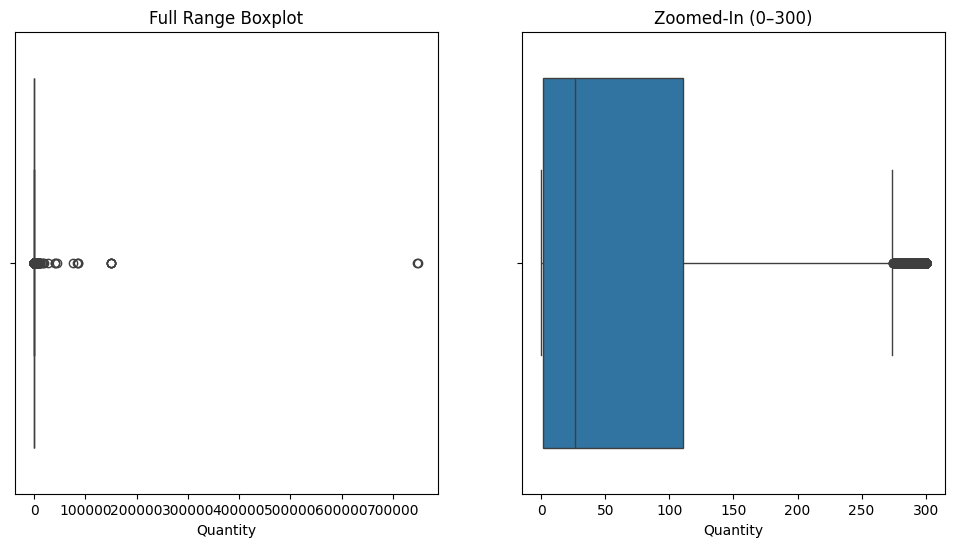

In [ ]:
plt.figure(figsize=(12, 6))

# Full range boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x = df["Quantity"])
plt.title('Full Range Boxplot')

# Zoomed-in boxplot for 75% data
plt.subplot(1, 2, 2)
sns.boxplot(x=df[df["Quantity"] <= 300]["Quantity"])
plt.title('Zoomed-In (0–300)')

plt.show()

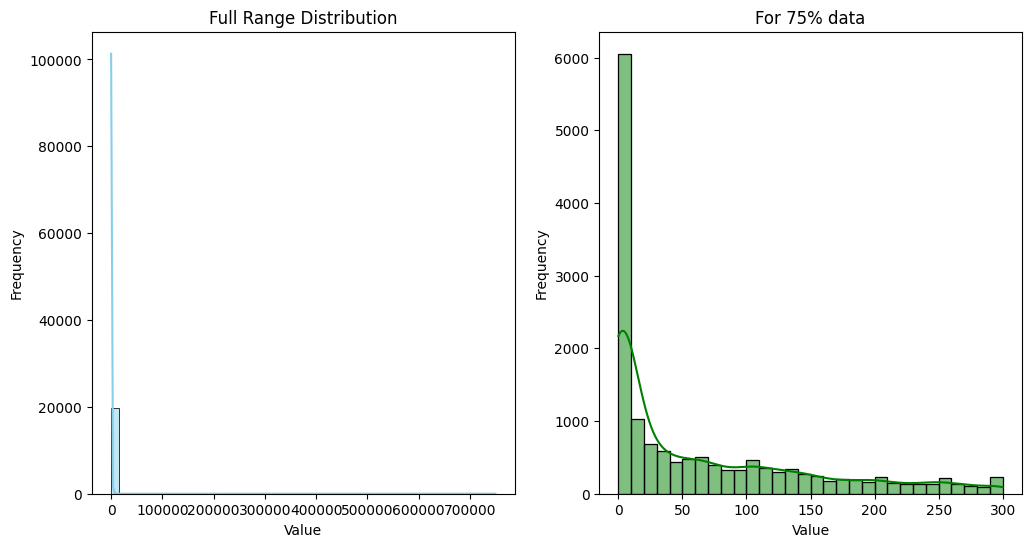

In [ ]:
plt.figure(figsize=(12, 6))

# Full range histogram
plt.subplot(1, 2, 1)
sns.histplot(x = df["Quantity"], bins=50, color='skyblue', edgecolor='black' , kde = True)
plt.title('Full Range Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Zoomed-in histogram for 75% data
plt.subplot(1, 2, 2)
sns.histplot(x=df[df["Quantity"] <= 300]["Quantity"], bins=30, color='green', kde=True)
plt.title('For 75% data')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.show()


**Outliers Analysis Using IQR**

In [ ]:
outliers = pd.DataFrame(df[(df["Quantity"] > upper_bound) | (df["Quantity"] < lower_bound)])

In [ ]:
outliers["Quantity"]

42        816.500000
48        810.034476
50        810.034476
76        991.532433
77        991.532433
            ...     
19706     758.799883
19707    1720.940369
19712     746.305913
19815     746.300000
19833    1198.366157
Name: Quantity, Length: 1686, dtype: float64

In [ ]:
print("Shape:",outliers.shape)
print("Minimum:",outliers["Quantity"].min())
print("Maximum",outliers["Quantity"].max())

Shape: (1686, 8)
Minimum: 731.0924444797905
Maximum 750000.0


**Outlier Analysis using Z-Score Method**

In [ ]:
from scipy.stats import zscore
df['Z-Score'] = zscore(df['Quantity'])
z_outliers = df[df['Z-Score'].abs() > 3]

In [ ]:
z_outliers["Quantity"]

1976      40000.000000
2034      40000.000000
6498      45200.000000
6649      26353.968605
14099     75170.000000
14108     84956.000000
14109     84956.000000
14110     84744.585000
14238    150000.000000
14239    150000.000000
14334    150000.000000
14335    150000.000000
14336    150000.000000
15829    750000.000000
15830    748125.000000
Name: Quantity, dtype: float64

In [ ]:
print("Shape:",z_outliers.shape)
print("Minimum:",z_outliers["Quantity"].min())
print("Maximum",z_outliers["Quantity"].max())

Shape: (15, 9)
Minimum: 26353.9686053412
Maximum 750000.0


### **Method**

In [ ]:
df["Method"].nunique()

88

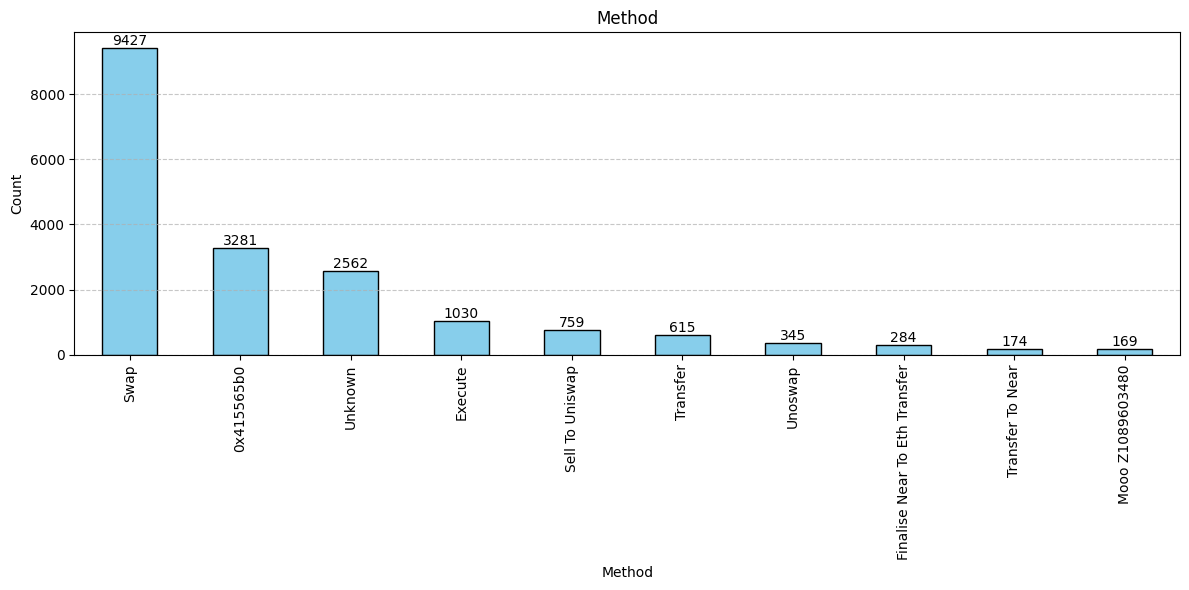

In [ ]:
plt.figure(figsize=(12, 6))
top_10 = df["Method"].value_counts().head(10)
top_10.plot(kind = "bar",color = "skyblue" , edgecolor = "k")
plt.title("Method")
plt.xlabel("Method")
plt.ylabel("Count")
for i, count in enumerate(top_10):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### **To column**

In [ ]:
###Check for the valid length of Ethereum Address

invalid_addresses = df[(df['To'].str.len() != 42)]
print("Invalid Ethereum Addresses:")
print(invalid_addresses)

Invalid Ethereum Addresses:
Empty DataFrame
Columns: [Transaction Hash, Blockno, UnixTimestamp, DateTime (UTC), From, To, Quantity, Method, Z-Score]
Index: []


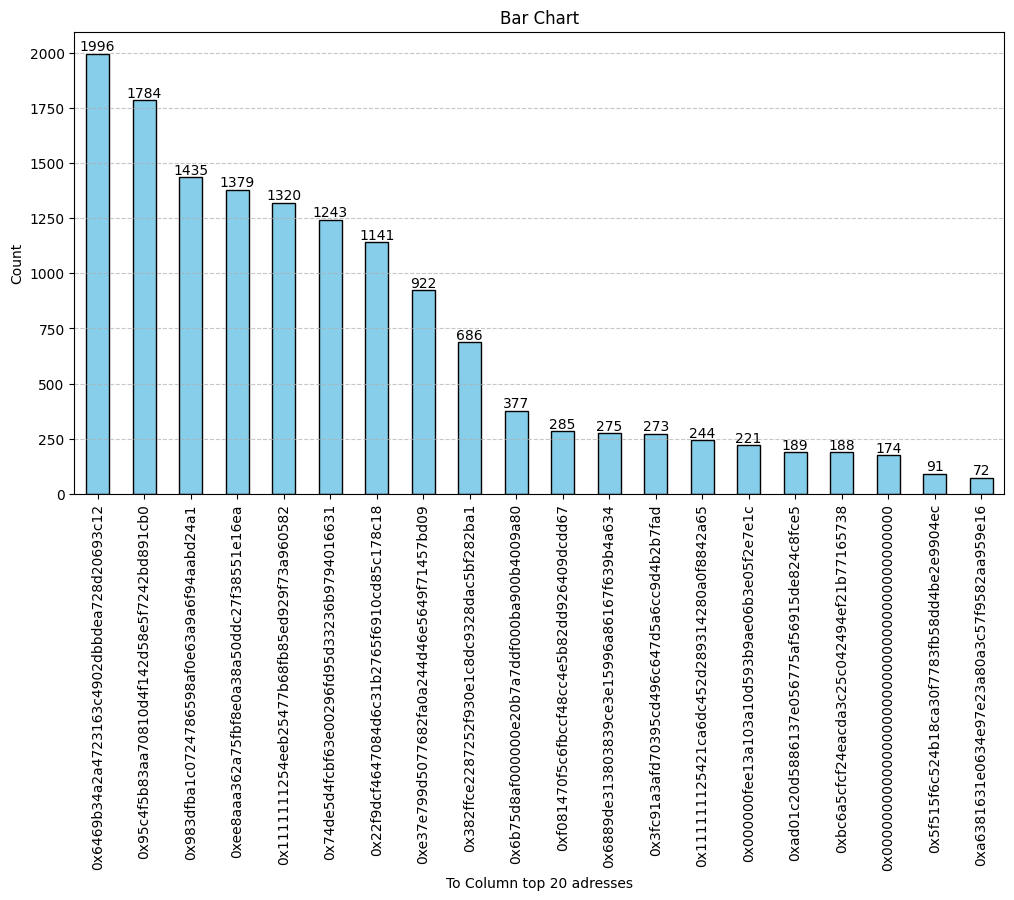

In [ ]:
plt.figure(figsize=(12, 6))
top_20_in_TO_col = df["To"].value_counts().head(20)
top_20_in_TO_col.plot(kind = "bar",color = "skyblue" , edgecolor = "k")
plt.title("Bar Chart")
plt.xlabel("To Column top 20 adresses")
plt.ylabel("Count")
for i, count in enumerate(top_20_in_TO_col):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### **From column**

In [ ]:
### checking for the valid length of ethereum address
invalid_addresses = df[(df['From'].str.len() != 42)]
print("Invalid Ethereum Addresses:")
print(invalid_addresses)

Invalid Ethereum Addresses:
Empty DataFrame
Columns: [Transaction Hash, Blockno, UnixTimestamp, DateTime (UTC), From, To, Quantity, Method, Z-Score]
Index: []


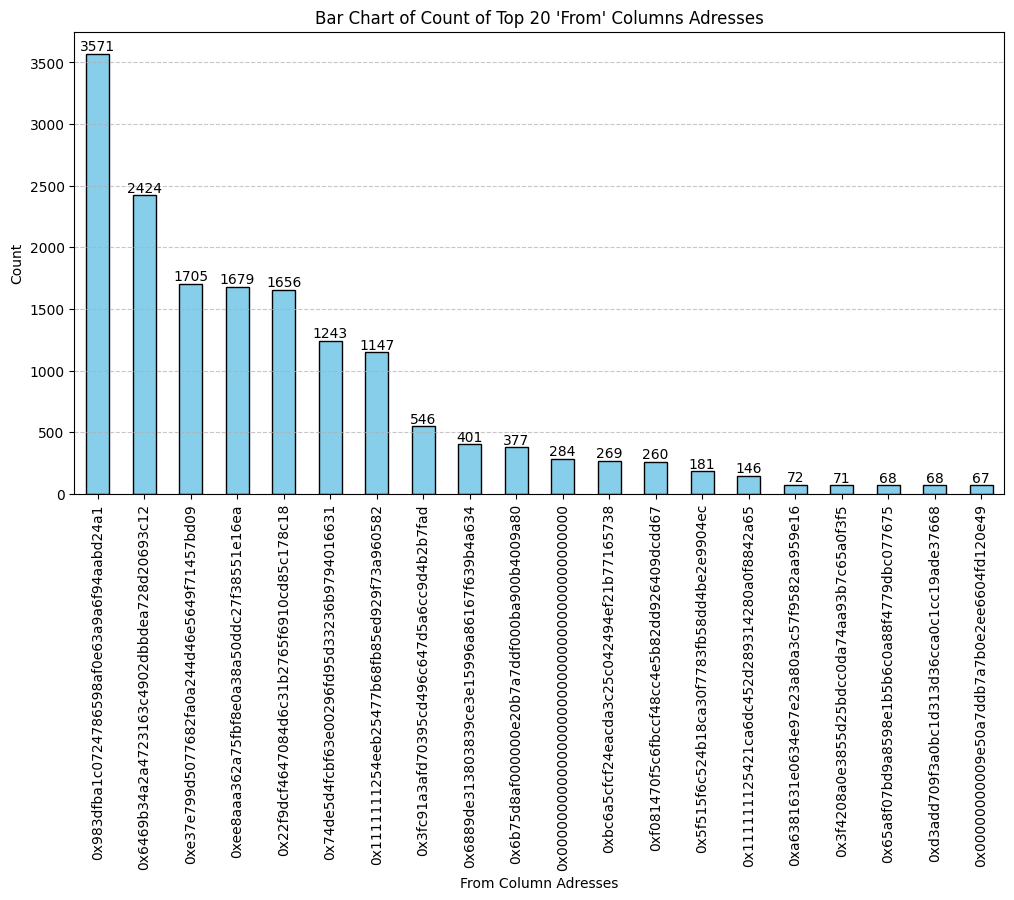

In [ ]:
plt.figure(figsize=(12, 6))
top_20_from_col = df["From"].value_counts().head(20)
top_20_from_col.plot(kind = "bar",color = "skyblue" , edgecolor = "k")
plt.title("Bar Chart of Count of Top 20 'From' Columns Adresses")
plt.xlabel("From Column Adresses")
plt.ylabel("Count")
for i, count in enumerate(top_20_from_col):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### **Blockno**

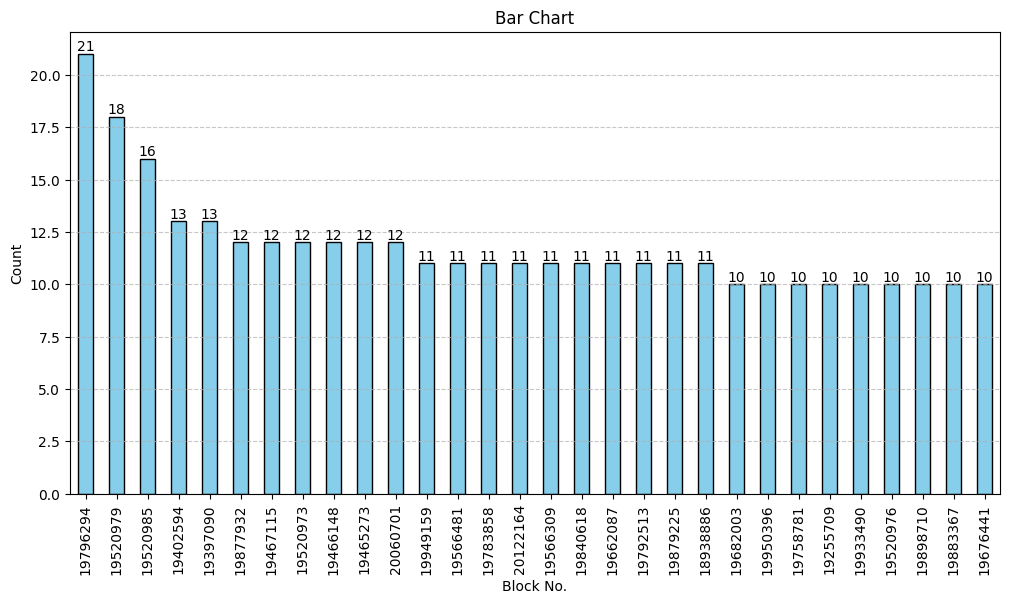

In [ ]:
plt.figure(figsize=(12, 6))
top_30_blocks = df["Blockno"].value_counts().head(30)
top_30_blocks.plot(kind = "bar",color = "skyblue" , edgecolor = "k")
plt.title("Bar Chart")
plt.xlabel("Block No.")
plt.ylabel("Count")
for i, count in enumerate(top_30_blocks):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### **Transaction Hash**

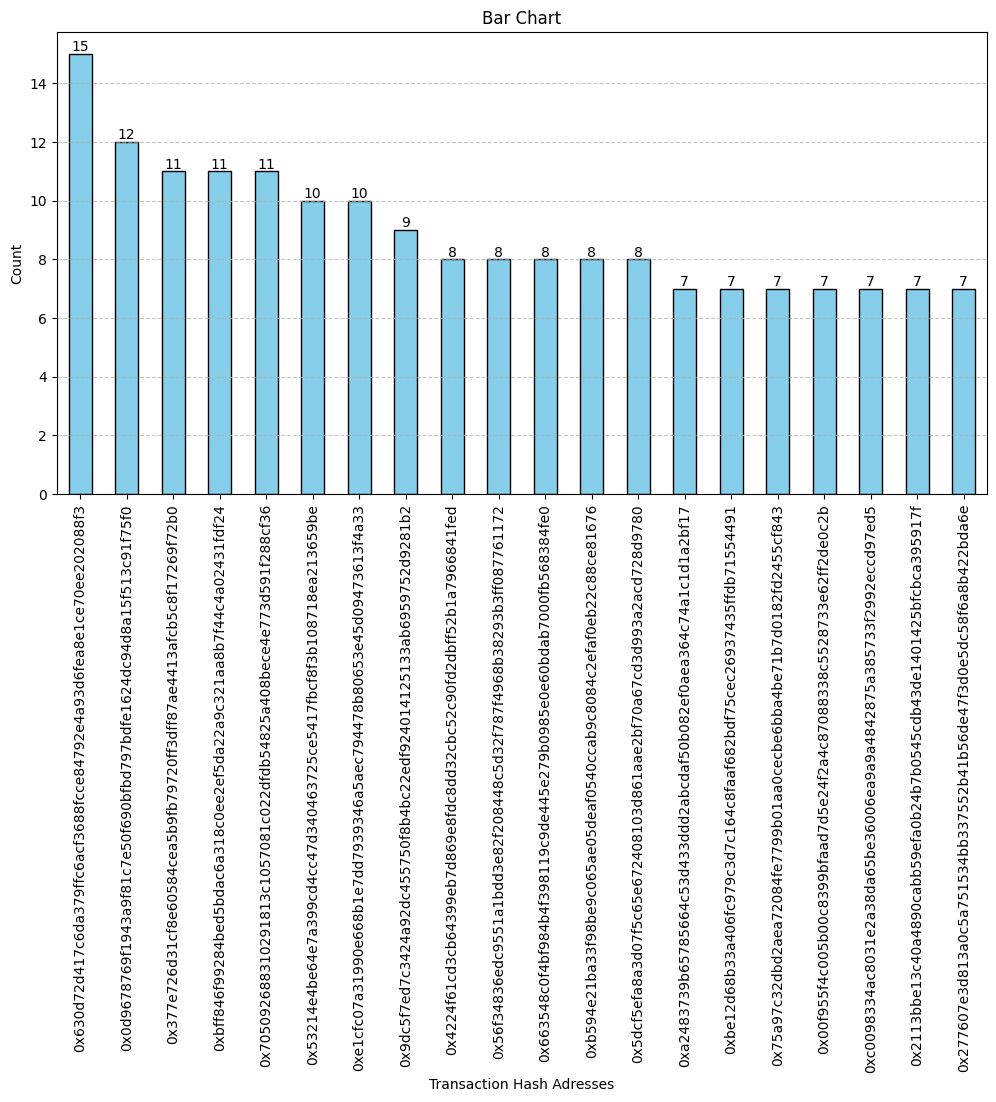

In [ ]:
plt.figure(figsize=(12, 6))
top_20_hash_transactions = df["Transaction Hash"].value_counts().head(20)
top_20_hash_transactions.plot(kind = "bar",color = "skyblue" , edgecolor = "k")
plt.title("Bar Chart")
plt.xlabel("Transaction Hash Adresses")
plt.ylabel("Count")
for i, count in enumerate(top_20_hash_transactions):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# **Bivariate Analysis**

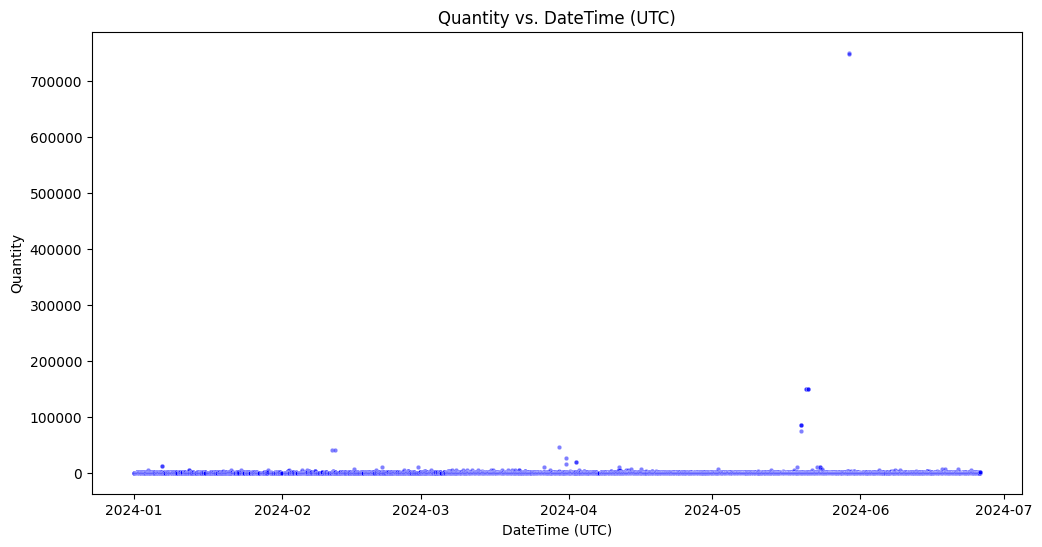

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x = df['DateTime (UTC)'], y =df['Quantity'], alpha=0.5, color='blue', s=10)
plt.title("Quantity vs. DateTime (UTC)")
plt.xlabel("DateTime (UTC)")
plt.ylabel("Quantity")
plt.show()

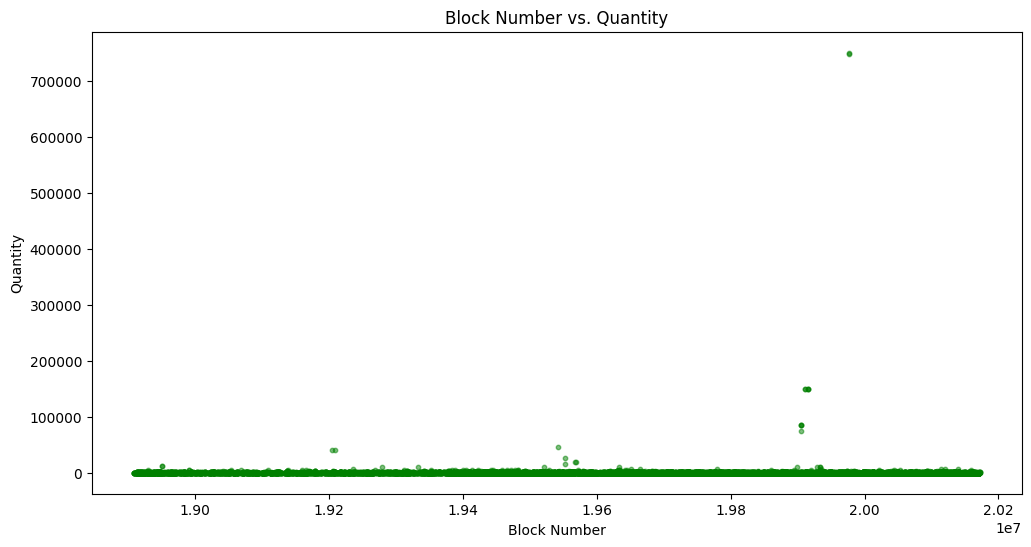

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(df['Blockno'], df['Quantity'], alpha=0.5, color='green', s=10)
plt.title("Block Number vs. Quantity")
plt.xlabel("Block Number")
plt.ylabel("Quantity")
plt.show()


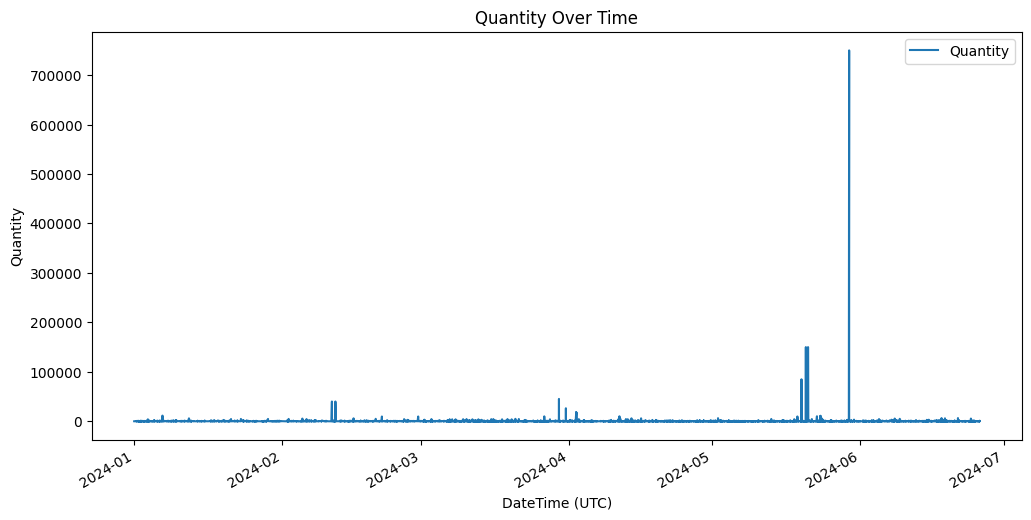

In [ ]:
df.sort_values('DateTime (UTC)').plot(x='DateTime (UTC)', y='Quantity', kind='line', figsize=(12, 6))
plt.title('Quantity Over Time')
plt.xlabel('DateTime (UTC)')
plt.ylabel('Quantity')
plt.show()


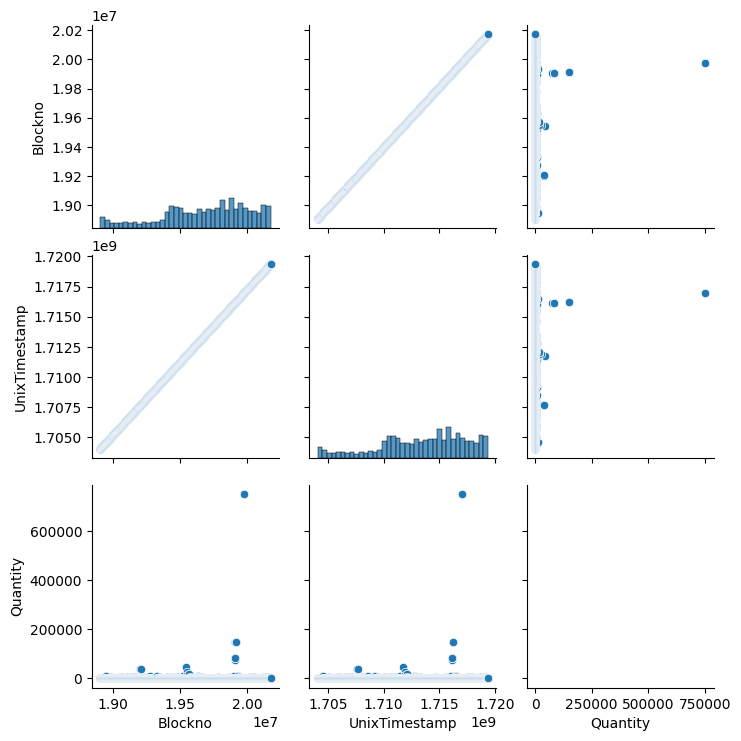

In [ ]:
sns.pairplot(df[['Blockno', 'UnixTimestamp', 'Quantity']])
plt.show()


# **Feature Engineering**

In [ ]:
data = df.copy()  ## making deep copy of df dataframe

In [ ]:
### Creating new features from DateTime column

def new_features_from_DateTime(df):
  data = df.assign(
    month=df["DateTime (UTC)"].dt.month,
    date=df["DateTime (UTC)"].dt.day,
    hour=df["DateTime (UTC)"].dt.hour,
    day_of_week=df["DateTime (UTC)"].dt.day_name(),
    is_weekend=(df["DateTime (UTC)"].dt.dayofweek >= 5).astype(int)
)
  return data

data = new_features_from_DateTime(df)


data.sample(5)


Transaction Hash   Blockno  \
4706   0xe5bca7ff0a4f2e37e87924bfe5d34fcc1cdd881a9005...  19456673   
4599   0xd4759ca0c87390af4e6fd04220d3f477688742a0e782...  19454121   
5549   0x843137e12ae36f399b4b69181865a88b585bf1f9a642...  19498819   
7429   0x33c61ee4058a9f7ac47020b78063481b1355c7b61e21...  19601548   
14601  0x0845db92e7ca7a8affb7ff073a933bcf53cdd1893eed...  19928666   

       UnixTimestamp      DateTime (UTC)  \
4706      1710704063 2024-03-17 19:34:23   
4599      1710673091 2024-03-17 10:58:11   
5549      1711215299 2024-03-23 17:34:59   
7429      1712465483 2024-04-07 04:51:23   
14601     1716420059 2024-05-22 23:20:59   

                                             From  \
4706   0x6889de313803839ce3e15996a86167f639b4a634   
4599   0x983dfba1c0724786598af0e63a9a6f94aabd24a1   
5549   0x74de5d4fcbf63e00296fd95d33236b9794016631   
7429   0xe37e799d5077682fa0a244d46e5649f71457bd09   
14601  0x74de5d4fcbf63e00296fd95d33236b9794016631   

                                               To    Quantity Method  \
4706   0x983dfba1c0724786598af0e63a9a6f94aabd24a1  618.892814   Swap   
4599   0x95c4f5b83aa70810d4f142d58e5f7242bd891cb0    0.094377   Swap   
5549   0x1bdd768cfee3744e73039ab81b2bb1050d2f0563   51.792174   Swap   
7429   0x382ffce2287252f930e1c8dc9328dac5bf282ba1    0.833607   Swap   
14601  0x3f65e961c3814c0b05683eaba6f2365c0b145614   60.170388   Swap   

        Z-Score  month  date  hour day_of_week  is_weekend  
4706   0.030070      3    17    19      Sunday           1  
4599  -0.047197      3    17    10      Sunday           1  
5549  -0.040742      3    23    17    Saturday           1  
7429  -0.047105      4     7     4      Sunday           1  
14601 -0.039696      5    22    23   Wednesday           0

In [ ]:
# Define bins and labels based on the statistics of quantity column
bins = [0, 3.21358, 72.444861, 293.678666, 1000 , float('inf')]  # Min, 25%, 50%, 75%, Max
labels = ["Very Low", "Low", "Medium", "High" , "Very High"]

# Create a new column for Quantity categories
data["Quantity Category"] = pd.cut(data["Quantity"], bins=bins, labels=labels)

# Check the distribution
print(data["Quantity Category"].value_counts())


Quantity Category
Medium       4959
Low          4956
Very Low     4947
High         4224
Very High     735
Name: count, dtype: int64


In [ ]:
# Flag high quantity transactions
data["High Quantity Flag"] = (data["Quantity"] > 294).astype(int)  ### Here we take threshold as 75% quantile of the Quantity column

# Check if From and To addresses are the same (self-transaction)
data["Is Self Transaction"] = (data["From"] == data["To"]).astype(int)

In [ ]:
data.sample(10)

Transaction Hash   Blockno  \
8626   0xcc4ea5ee48041d0af2a1e6fbf4f565a895f260657b26...  19666345   
165    0x51a7739f397e995b083a2aab63575baa73a9c6d33612...  18919446   
18988  0x2c8c96922d96a01ad4cb759096d6a62b550de329985a...  20136180   
13887  0x02c20354f4408094cfc23603115be9c681edd4a2b7b0...  19893981   
2450   0x6d7284d7f4adcb570aeb0ef39bfb67b8b2de5d663ce7...  19280165   
13314  0x1336691ddf958f025b11aa865c638c83e9e3ff6f8fac...  19878856   
7129   0x9173e132f992a9e874ac2d35b41df060d546197a22b3...  19582214   
14114  0xaa29cdd03f900a3747e782bc5ae4b30dce7aa6930501...  19905176   
17128  0xa112b4e9bedb125160a76cb8397f32e6602cb80205a7...  20043667   
14416  0xa7871cef4122aa78aea961c037265c53a5814fdaba29...  19919308   

       UnixTimestamp      DateTime (UTC)  \
8626      1713249947 2024-04-16 06:45:47   
165       1704195455 2024-01-02 11:37:35   
18988     1718925671 2024-06-20 23:21:11   
13887     1716000791 2024-05-18 02:53:11   
2450      1708568627 2024-02-22 02:23:47   
13314     1715818043 2024-05-16 00:07:23   
7129      1712231423 2024-04-04 11:50:23   
14114     1716136127 2024-05-19 16:28:47   
17128     1717808159 2024-06-08 00:55:59   
14416     1716306899 2024-05-21 15:54:59   

                                             From  \
8626   0x00000000009e50a7ddb7a7b0e2ee6604fd120e49   
165    0x6889de313803839ce3e15996a86167f639b4a634   
18988  0xe37e799d5077682fa0a244d46e5649f71457bd09   
13887  0x983dfba1c0724786598af0e63a9a6f94aabd24a1   
2450   0x3eb1aeb22f36fb0fe9f2ffd77ffab297eafde102   
13314  0xee8aaa362a75fbf8e0a38a50ddc27f38551e16ea   
7129   0x071fd7e169e529fe6486cf5e8bee704bb6931968   
14114  0xe37e799d5077682fa0a244d46e5649f71457bd09   
17128  0xee8aaa362a75fbf8e0a38a50ddc27f38551e16ea   
14416  0x983dfba1c0724786598af0e63a9a6f94aabd24a1   

                                               To     Quantity         Method  \
8626   0x983dfba1c0724786598af0e63a9a6f94aabd24a1   167.826828        Unknown   
165    0x983dfba1c0724786598af0e63a9a6f94aabd24a1   700.000000           Swap   
18988  0x6469b34a2a4723163c4902dbbdea728d20693c12    80.000000           Swap   
13887  0x95c4f5b83aa70810d4f142d58e5f7242bd891cb0     0.082697           Swap   
2450   0x74de5d4fcbf63e00296fd95d33236b9794016631   191.000000           Swap   
13314  0x6b75d8af000000e20b7a7ddf000ba900b4009a80  1280.668072        Unknown   
7129   0xe37e799d5077682fa0a244d46e5649f71457bd09   628.000000  Settle Orders   
14114  0xee8aaa362a75fbf8e0a38a50ddc27f38551e16ea   300.000000           Swap   
17128  0x3fc91a3afd70395cd496c647d5a6cc9d4b2b7fad    11.615056        Execute   
14416  0x95c4f5b83aa70810d4f142d58e5f7242bd891cb0     0.007531     0x415565b0   

        Z-Score  month  date  hour day_of_week  is_weekend Quantity Category  \
8626  -0.026253      4    16     6     Tuesday           0            Medium   
165    0.040197      1     2    11     Tuesday           0              High   
18988 -0.037220      6    20    23    Thursday           0            Medium   
13887 -0.047199      5    18     2    Saturday           1          Very Low   
2450  -0.023360      2    22     2    Thursday           0            Medium   
13314  0.112703      5    16     0    Thursday           0         Very High   
7129   0.031207      4     4    11    Thursday           0              High   
14114 -0.009749      5    19    16      Sunday           1              High   
17128 -0.045759      6     8     0    Saturday           1               Low   
14416 -0.047208      5    21    15     Tuesday           0          Very Low   

       High Quantity Flag  Is Self Transaction  
8626                    0                    0  
165                     1                    0  
18988                   0                    0  
13887                   0                    0  
2450                    0                    0  
13314                   1                    0  
7129                    1                    0  
14114                   1          

In [ ]:
# Flag outliers based on Z-Score (e.g., abs(Z-Score) > 3)
data["Is Outlier"] = (data["Z-Score"].abs() > 3).astype(int)


In [ ]:
data["Log Quantity"] = np.log1p(data["Quantity"])   ## For Handle Skewness in the Quantity colummn

In [ ]:
# Count transactions per address
data["From Activity Count"] = data["From"].map(data["From"].value_counts())
data["To Activity Count"] = data["To"].map(data["To"].value_counts())

# Count unique addresses
print(data["From"].nunique())
print(data["To"].nunique())


1823
3273


In [ ]:
# Sort by wallet and DateTime
data = data.sort_values(by=["From", "DateTime (UTC)"])

# Cumulative sum of Quantity per wallet
data["Cumulative Quantity"] = data.groupby("From")["Quantity"].cumsum()


In [ ]:
data.sample(10)

Transaction Hash   Blockno  \
14250  0x59e4f57660febcc316dc3df94bc945a36cead3fa0143...  19912382   
14702  0x4e04d80708260faddeb2dee3cefbc52f7832621421b4...  19932407   
16706  0xb08ab83d53609c264a22f1473bc65567e9a82c37a5de...  20019278   
3780   0x13fa9916ea9b4e335a20c0829aeb922f14a091a3988c...  19419731   
3906   0x5b6a6c132335c477f6baae59cb3fe19a3b46ad2cc08a...  19423961   
4046   0x945b2b615bb2c101c0a0103cc9971d5f6f2408257b39...  19431106   
15641  0xc7fe2df04767d8c4f4bb0c050190de6580fa79545af9...  19968454   
5892   0x4359c59546fa85528d75fdf9baf5f2c2706d7dda980d...  19516275   
3892   0x89265209c2caf20bdf14fbf7ddff28636a2baa30713d...  19423350   
16079  0x06b1e07da57e35667fa1b5899c78ba8ce3aa67e01047...  19987757   

       UnixTimestamp      DateTime (UTC)  \
14250     1716223139 2024-05-20 16:38:59   
14702     1716465167 2024-05-23 11:52:47   
16706     1717514003 2024-06-04 15:13:23   
3780      1710255335 2024-03-12 14:55:35   
3906      1710306467 2024-03-13 05:07:47   
4046      1710393239 2024-03-14 05:13:59   
15641     1716900371 2024-05-28 12:46:11   
5892      1711427723 2024-03-26 04:35:23   
3892      1710299039 2024-03-13 03:03:59   
16079     1717133663 2024-05-31 05:34:23   

                                             From  \
14250  0x6469b34a2a4723163c4902dbbdea728d20693c12   
14702  0x6889de313803839ce3e15996a86167f639b4a634   
16706  0xee8aaa362a75fbf8e0a38a50ddc27f38551e16ea   
3780   0x983dfba1c0724786598af0e63a9a6f94aabd24a1   
3906   0x22f9dcf4647084d6c31b2765f6910cd85c178c18   
4046   0xe37e799d5077682fa0a244d46e5649f71457bd09   
15641  0xe37e799d5077682fa0a244d46e5649f71457bd09   
5892   0x983dfba1c0724786598af0e63a9a6f94aabd24a1   
3892   0x22f9dcf4647084d6c31b2765f6910cd85c178c18   
16079  0xee8aaa362a75fbf8e0a38a50ddc27f38551e16ea   

                                               To     Quantity      Method  \
14250  0x1111111254eeb25477b68fb85ed929f73a960582    79.311487        Swap   
14702  0xf081470f5c6fbccf48cc4e5b82dd926409dcdd67   500.000000        Swap   
16706  0x3fc91a3afd70395cd496c647d5a6cc9d4b2b7fad    16.345029     Execute   
3780   0xf081470f5c6fbccf48cc4e5b82dd926409dcdd67   354.350195        Swap   
3906   0x983dfba1c0724786598af0e63a9a6f94aabd24a1  1133.125747  0x415565b0   
4046   0x1111111254eeb25477b68fb85ed929f73a960582   753.461976        Swap   
15641  0x7fbda98a7da7d9f737b025ae47c3ebe5796c0e17     0.032026        Swap   
5892   0x1111111254eeb25477b68fb85ed929f73a960582    61.416223        Swap   
3892   0x73df47dc1972e98e942a7e3e96f7dd566b416396   180.433741  0x415565b0   
16079  0xe37e799d5077682fa0a244d46e5649f71457bd09   464.679351        Swap   

        Z-Score  month  ...  day_of_week  is_weekend Quantity Category  \
14250 -0.037306      5  ...       Monday           0            Medium   
14702  0.015224      5  ...     Thursday           0              High   
16706 -0.045168      6  ...      Tuesday           0               Low   
3780  -0.002963      3  ...      Tuesday           0              High   
3906   0.094280      3  ...    Wednesday           0         Very High   
4046   0.046873      3  ...     Thursday           0              High   
15641 -0.047205      5  ...      Tuesday           0          Very Low   
5892  -0.039540      3  ...      Tuesday           0               Low   
3892  -0.024679      3  ...    Wednesday           0            Medium   
16079  0.010814      5  ...       Friday           0              High   

       High Quantity Flag Is Self Transaction  Is Outlier  Log Quantity  \
14250                   0                   0           0      4.385913   
14702                   1                   0           0      6.216606   
16706                   0                   0           0      2.853306   
3780                    1                   0           0      5.873104   
3906                    1                   0           0      7.033617   
4046                    1                   0           0      6.626005   
1

**Network analysis**

In [ ]:
import networkx as nx
import pandas as pd


In [ ]:
#Create a directed graph from the 'From' and 'To' columns
G = nx.DiGraph()

# Add edges with weights if required (e.g., using 'Quantity' as weight)
for index, row in data.iterrows():
    G.add_edge(row['From'], row['To'], weight=row['Quantity'])

# Calculate centralities
# Degree centrality
degree_centrality = nx.degree_centrality(G)

# Betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G, weight='weight')

# Closeness centrality
closeness_centrality = nx.closeness_centrality(G)

# Map centralities back to the DataFrame
# Create new columns in the DataFrame to store centrality measures for 'From' nodes
data['from_degree_centrality'] = data['From'].map(degree_centrality)
data['from_betweenness_centrality'] = data['From'].map(betweenness_centrality)
data['from_closeness_centrality'] = data['From'].map(closeness_centrality)

# Similarly, create columns for 'To' nodes
data['to_degree_centrality'] = data['To'].map(degree_centrality)
data['to_betweenness_centrality'] = data['To'].map(betweenness_centrality)
data['to_closeness_centrality'] = data['To'].map(closeness_centrality)



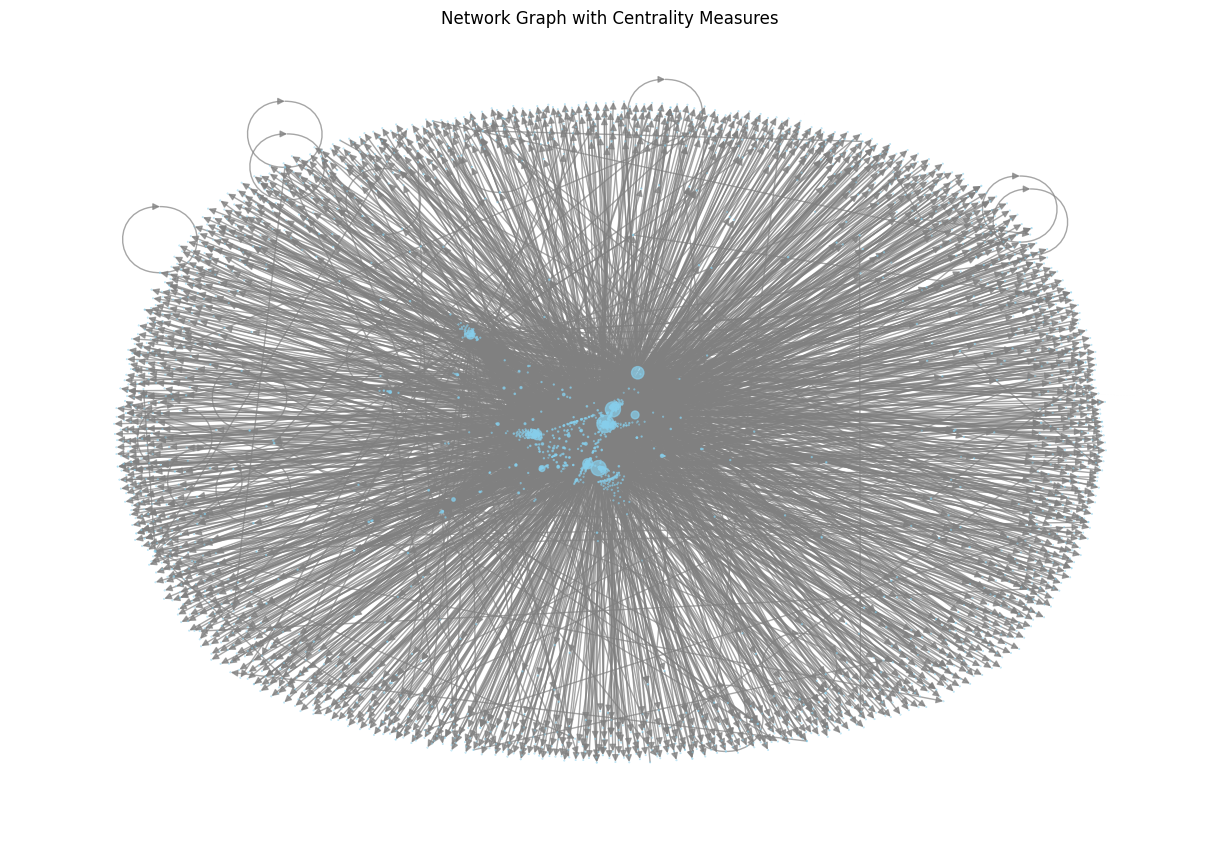

In [ ]:
# Ensure the DataFrame has the feature-engineered columns, including 'From' and 'To'

# Step 1: Create a directed graph from the 'From' and 'To' columns
G = nx.DiGraph()

# Add edges with weights if required (e.g., using 'Quantity' as weight)
for index, row in data.iterrows():
    G.add_edge(row['From'], row['To'], weight=row['Quantity'])

# Step 2: Visualize the graph
plt.figure(figsize=(12, 8))

# Draw the network
# Node size is proportional to degree centrality
node_sizes = [500 * nx.degree_centrality(G)[node] for node in G.nodes()]
edge_weights = [G[u][v]['weight'] for u, v in G.edges()]  # Scale for visualizing edge weights

# Using a spring layout for better spacing of nodes
pos = nx.spring_layout(G, seed=42)

nx.draw(
    G,
    pos,
    node_size=node_sizes,
    node_color='skyblue',
    edge_color='gray',
    width=1.0,
    alpha=0.7,
    font_size=10
)

# Display the plot
plt.title("Network Graph with Centrality Measures")
plt.show()


In [ ]:
import plotly.graph_objects as go
import networkx as nx

# Assuming 'G' is your networkx graph and 'data' is your DataFrame

# 1. Create node positions for visualization
pos = nx.spring_layout(G)  # You can experiment with other layout algorithms

# 2. Create edge traces
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

# 3. Create node traces
node_x = []
node_y = []
node_text = []  # To display node information on hover
for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    node_text.append(f"Address: {node}<br>Degree: {G.degree(node)}")
    # Customize hover text with relevant information

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    text=node_text,
    marker=dict(
        showscale=True,
        colorscale='YlGnBu', # Choose a colorscale
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

# 4. Color nodes based on degree centrality (or other metrics)
node_adjacencies = []
node_text = []
for node, adjacencies in enumerate(G.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    node_text.append(f"Address: {adjacencies[0]}<br>Degree: {len(adjacencies[1])}") # Customize hover text

node_trace.marker.color = node_adjacencies
node_trace.text = node_text

# 5. Create the figure and add traces
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='NEAR Token Transaction Network',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)))

fig.show()

**Analysis of data**

In [ ]:
data.sample(5)

Transaction Hash   Blockno  \
11647  0xae602c481d1ff03253f10cf29f252b58e8f6e3b01e08...  19808808   
6065   0xd0946843410687ba216e5c4a516d33e40838fa4240a4...  19520982   
16769  0xbd2561d0a2ca5e7d70a342218686696c5f89cf2e4cfb...  20021310   
15709  0xf2efe5878973a49fba9dd7b0864064954ab1e59e57ef...  19971259   
10816  0xcb68279a45d401fd24b72e3d217466e73124f19a281a...  19783057   

       UnixTimestamp      DateTime (UTC)  \
11647     1714971455 2024-05-06 04:57:35   
6065      1711485023 2024-03-26 20:30:23   
16769     1717538483 2024-06-04 22:01:23   
15709     1716934247 2024-05-28 22:10:47   
10816     1714660379 2024-05-02 14:32:59   

                                             From  \
11647  0x22f9dcf4647084d6c31b2765f6910cd85c178c18   
6065   0xe37e799d5077682fa0a244d46e5649f71457bd09   
16769  0xe37e799d5077682fa0a244d46e5649f71457bd09   
15709  0x6469b34a2a4723163c4902dbbdea728d20693c12   
10816  0xc2ba5843be04071de55fe5d57c90ea29b5d37ecd   

                                               To    Quantity      Method  \
11647  0x0d64d4f19411f1898d255fea107c17a0ef5a77f1   39.397856  0x415565b0   
6065   0x6469b34a2a4723163c4902dbbdea728d20693c12  160.000000        Call   
16769  0x382ffce2287252f930e1c8dc9328dac5bf282ba1    0.745475        Swap   
15709  0x1111111254eeb25477b68fb85ed929f73a960582    0.699999        Swap   
10816  0xd12c49f8eb359cbeb7229be9abfcbe120f801023   34.855945    Transfer   

        Z-Score  month  ...  Log Quantity  From Activity Count  \
11647 -0.042290      5  ...      3.698777                 1656   
6065  -0.027230      3  ...      5.081404                 1705   
16769 -0.047116      6  ...      0.557027                 1705   
15709 -0.047122      5  ...      0.530628                 2424   
10816 -0.042857      5  ...      3.579509                    3   

      To Activity Count  Cumulative Quantity from_degree_centrality  \
11647                 1        271469.633491               0.235562   
6065               1996        123917.846882               0.096444   
16769               686        358762.679261               0.096444   
15709              1320        186743.909647               0.302418   
10816                 1           104.567835               0.001138   

       from_betweenness_centrality  from_closeness_centrality  \
11647                     0.168209                   0.209364   
6065                      0.069457                   0.213470   
16769                     0.069457                   0.213470   
15709                     0.373287                   0.234901   
10816                     0.000129                   0.154645   

       to_degree_centrality  to_betweenness_centrality  \
11647              0.000284                   0.000000   
6065               0.302418                   0.373287   
16769              0.001138                   0.000000   
15709              0.157610                   0.066913   
10816              0.000569                   0.000260   

       to_closeness_centrality  
11647                 0.143245  
6065                  0.234901  
16769                 0.161349  
15709                 0.176537  
10816                 0.115264  

[5 rows x 28 columns]

In [ ]:
data.isnull().sum()

Transaction Hash               0
Blockno                        0
UnixTimestamp                  0
DateTime (UTC)                 0
From                           0
To                             0
Quantity                       0
Method                         0
Z-Score                        0
month                          0
date                           0
hour                           0
day_of_week                    0
is_weekend                     0
Quantity Category              8
High Quantity Flag             0
Is Self Transaction            0
Is Outlier                     0
Log Quantity                   0
From Activity Count            0
To Activity Count              0
Cumulative Quantity            0
from_degree_centrality         0
from_betweenness_centrality    0
from_closeness_centrality      0
to_degree_centrality           0
to_betweenness_centrality      0
to_closeness_centrality        0
dtype: int64

In [ ]:
data.describe()

Blockno  UnixTimestamp                 DateTime (UTC)  \
count  1.982900e+04   1.982900e+04                          19829   
mean   1.968449e+07   1.713463e+09  2024-04-18 18:04:37.185889536   
min    1.890902e+07   1.704069e+09            2024-01-01 00:25:35   
25%    1.946602e+07   1.710818e+09            2024-03-19 03:07:35   
50%    1.973678e+07   1.714101e+09            2024-04-26 03:12:11   
75%    1.993754e+07   1.716527e+09            2024-05-24 05:06:35   
max    2.017186e+07   1.719357e+09            2024-06-25 23:04:35   
std    3.220912e+05   3.899327e+06                            NaN   

            Quantity       Z-Score         month          date          hour  \
count   19829.000000  1.982900e+04  19829.000000  19829.000000  19829.000000   
mean      378.076434  7.166703e-18      4.092642     15.548590     11.957386   
min         0.000000 -4.720908e-02      1.000000      1.000000      0.000000   
25%         3.214500 -4.680770e-02      3.000000      8.000000      5.000000   
50%        72.480398 -3.815871e-02      4.000000     16.000000     13.000000   
75%       293.707990 -1.053479e-02      5.000000     23.000000     18.000000   
max    750000.000000  9.360266e+01      6.000000     31.000000     23.000000   
std      8008.755294  1.000025e+00      1.472990      8.428048      7.158446   

         is_weekend  High Quantity Flag  ...  Log Quantity  \
count  19829.000000        19829.000000  ...  19829.000000   
mean       0.288416            0.249634  ...      3.754155   
min        0.000000            0.000000  ...      0.000000   
25%        0.000000            0.000000  ...      1.438531   
50%        0.000000            0.000000  ...      4.297019   
75%        1.000000            0.000000  ...      5.685985   
max        1.000000            1.000000  ...     13.527830   
std        0.453037            0.432812  ...      2.335075   

       From Activity Count  To Activity Count  Cumulative Quantity  \
count         19829.000000       19829.000000         1.982900e+04   
mean           1557.523577         891.534974         1.713366e+05   
min               1.000000           1.000000         0.000000e+00   
25%             284.000000          21.000000         1.924989e+04   
50%            1656.000000        1141.000000         1.308461e+05   
75%            2424.000000        1435.000000         2.720136e+05   
max            3571.000000        1996.000000         1.271448e+06   
std            1223.679990         725.054807         1.728831e+05   

       from_degree_centrality  from_betweenness_centrality  \
count            19829.000000                 19829.000000   
mean                 0.107344                     0.093251   
min                  0.000284                     0.000000   
25%                  0.006543                     0.002834   
50%                  0.070555                     0.045942   
75%                  0.234993                     0.140243   
max                  0.302418                     0.373287   
std                  0.106420                     0.117655   

       from_closeness_centrality  to_degree_centrality  \
count               19829.000000          19829.000000   
mean                    0.190616              0.085831   
min                     0.000000              0.000284   
25%                     0.162960              0.000853   
50%                     0.209364              0.011949   
75%                     0.213470              0.157610   
max                     0.234901              0.302418   
std                     0.042788              0.107410   

       to_betweenness_centrality  to_closeness_centrality  
count               19829.000000             19829.000000  
mean                    0.074212                 0.177432  
min                     0.000000                 0.000000  
25%                     0.000000                 0.144766  
50%                     0.019162                 0.176537  
75%                     0.114195     

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19829 entries, 13 to 10613
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Transaction Hash             19829 non-null  object        
 1   Blockno                      19829 non-null  int64         
 2   UnixTimestamp                19829 non-null  int64         
 3   DateTime (UTC)               19829 non-null  datetime64[ns]
 4   From                         19829 non-null  object        
 5   To                           19829 non-null  object        
 6   Quantity                     19829 non-null  float64       
 7   Method                       19829 non-null  object        
 8   Z-Score                      19829 non-null  float64       
 9   month                        19829 non-null  int32         
 10  date                         19829 non-null  int32         
 11  hour                         19829 non-null  

 Distribution of transactions by method

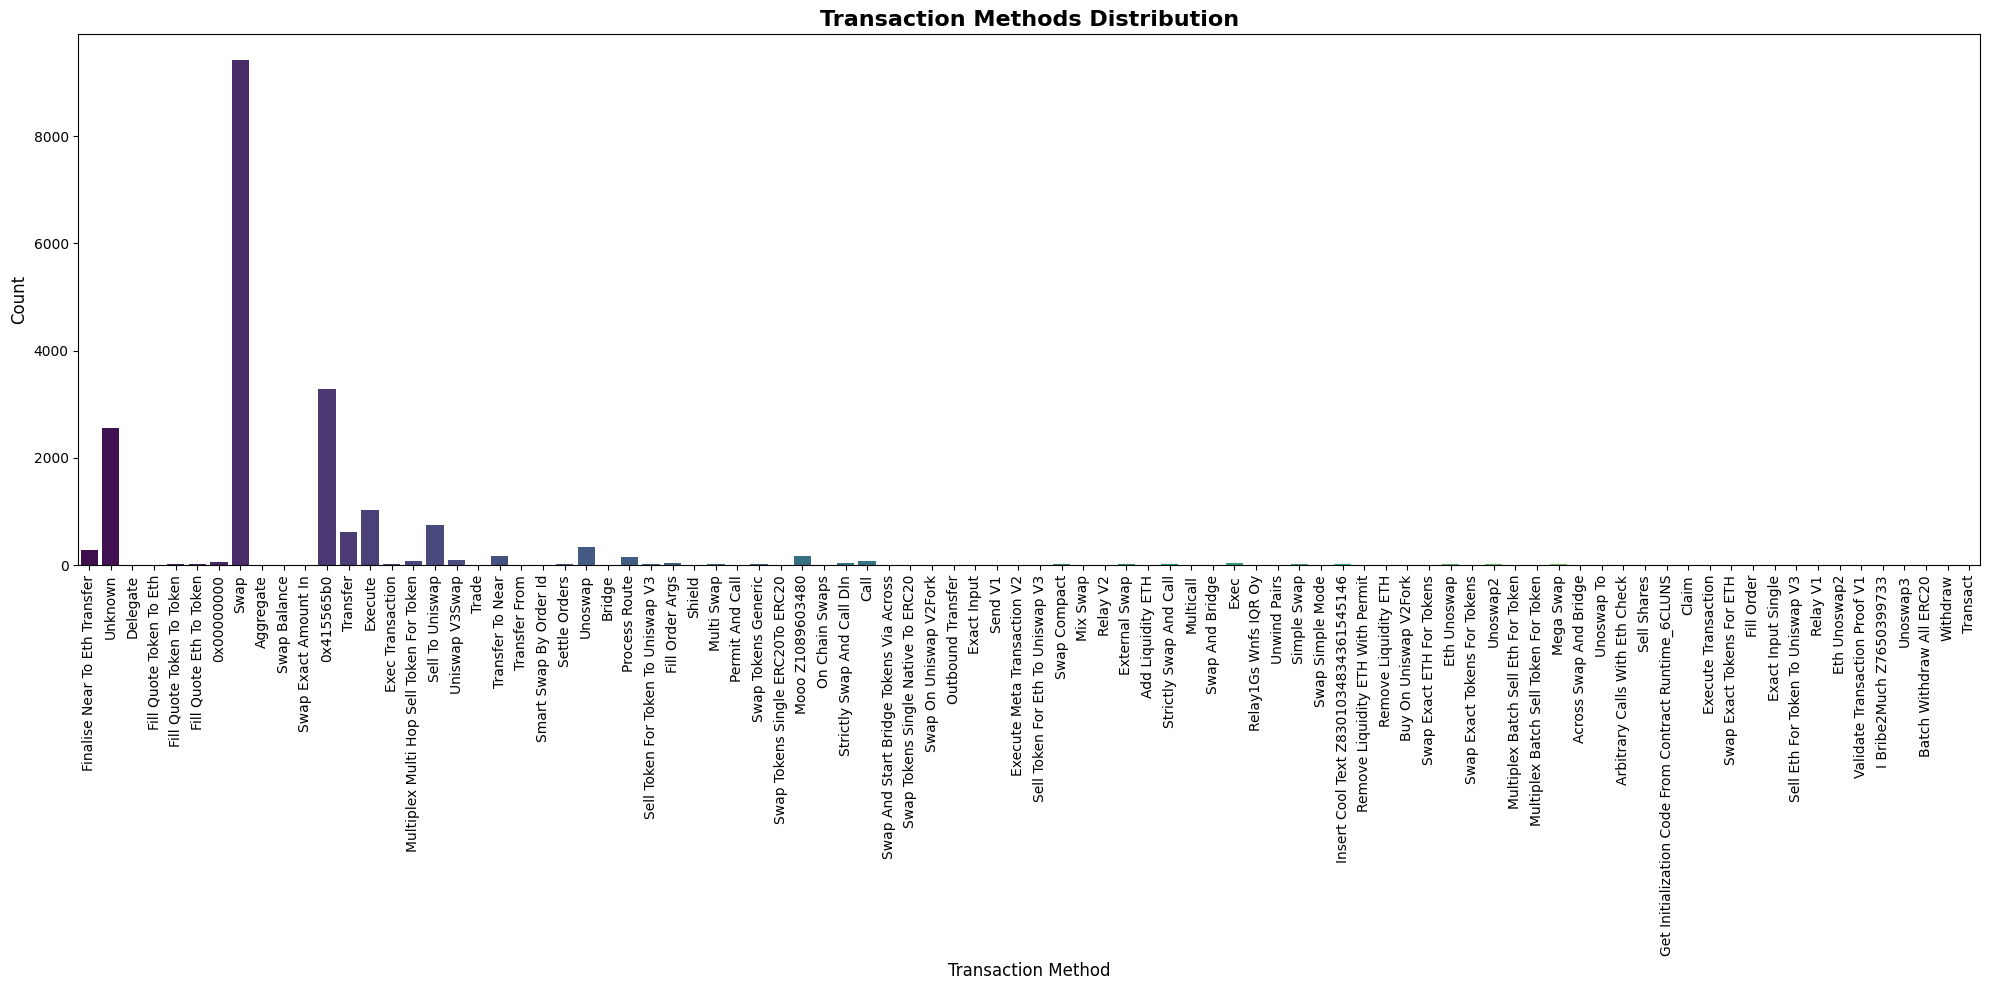

In [ ]:
plt.figure(figsize=(20, 10))
sns.countplot(data=data, x='Method', palette='viridis')
plt.title('Transaction Methods Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Transaction Method', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()
plt.show()

 Analyze quantity distribution

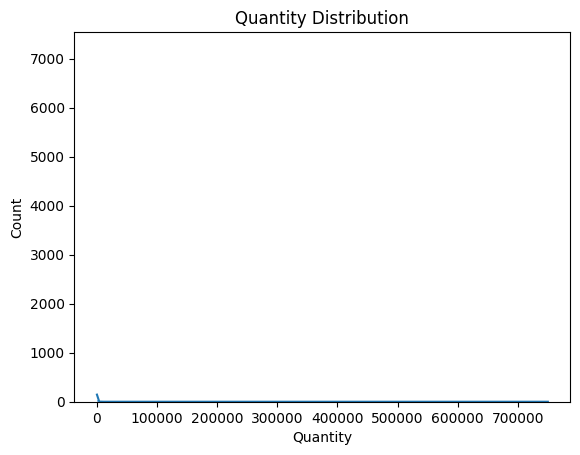

In [ ]:
sns.histplot(data=data, x='Quantity', kde=True)
plt.title('Quantity Distribution')
plt.show()

Correlation matrix

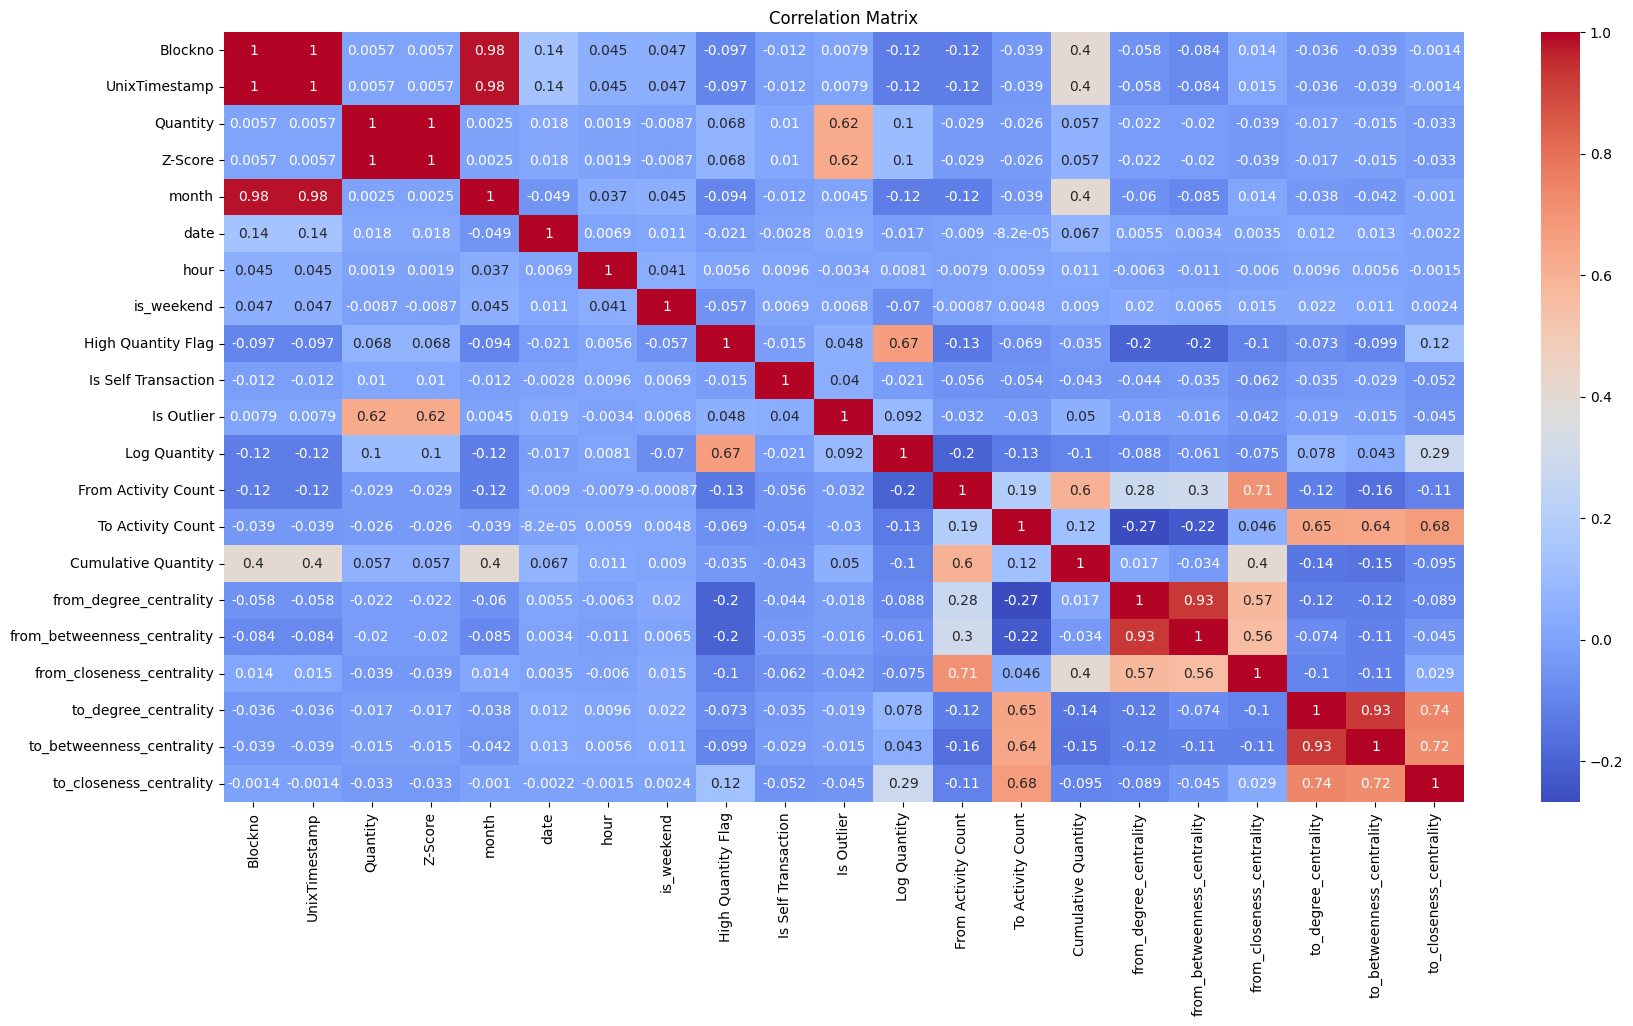

In [ ]:
numeric_data = data.select_dtypes(include=[np.number])
correlation = numeric_data.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Analyze Z-Score for outliers

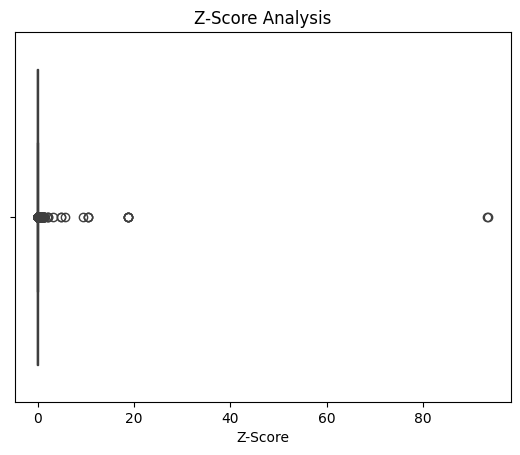

In [ ]:
sns.boxplot(data=data, x='Z-Score')
plt.title('Z-Score Analysis')
plt.show()

Group transactions by month , day and hour

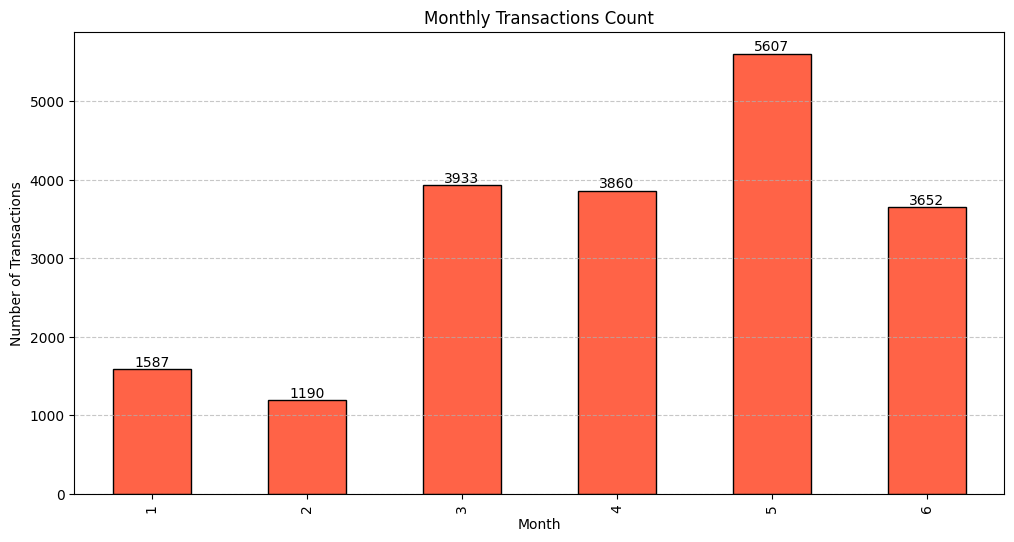

In [ ]:
plt.figure(figsize = (12,6))
monthly_transactions = data.groupby('month')['Transaction Hash'].count()
monthly_transactions.plot(kind='bar', color='tomato', edgecolor = "k")
plt.title('Monthly Transactions Count')
plt.ylabel('Number of Transactions')
for i, count in enumerate(monthly_transactions):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlabel('Month')
plt.show()

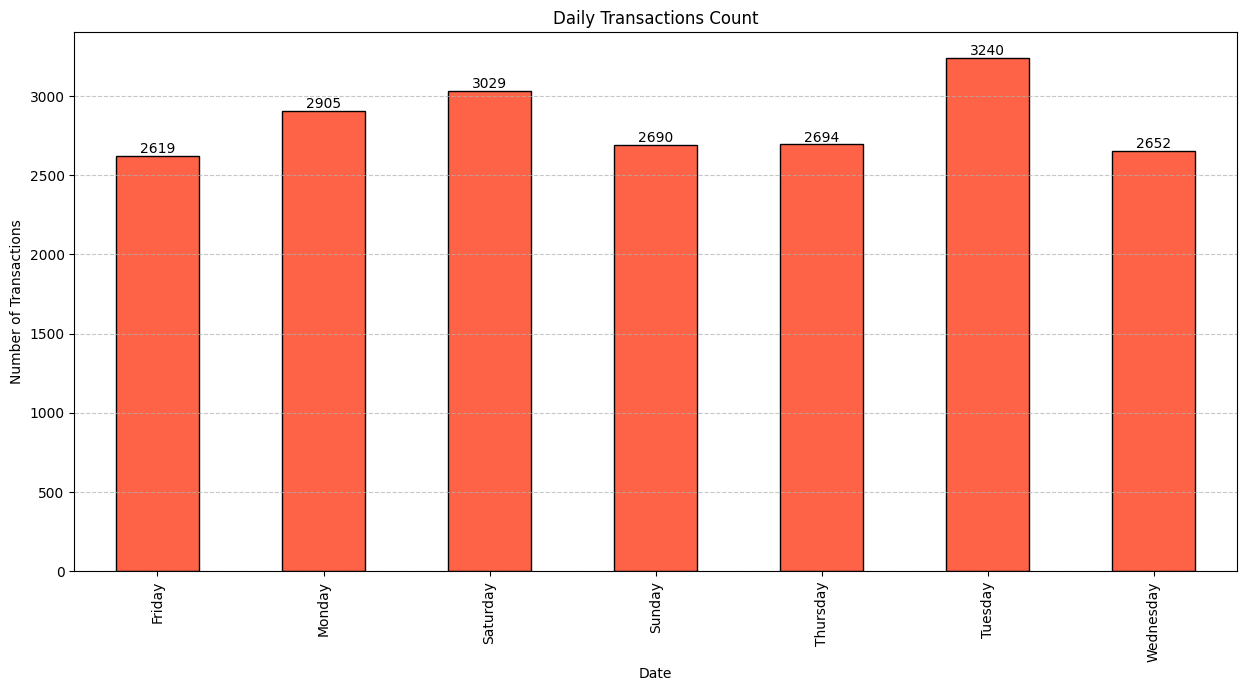

In [ ]:
plt.figure(figsize = (15,7))
daily_transactions = data.groupby('day_of_week')['Transaction Hash'].count()
daily_transactions.plot(kind='bar', color='tomato', edgecolor = "k")
plt.title('Daily Transactions Count')
plt.ylabel('Number of Transactions')
for i, count in enumerate(daily_transactions):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlabel('Date')
plt.show()

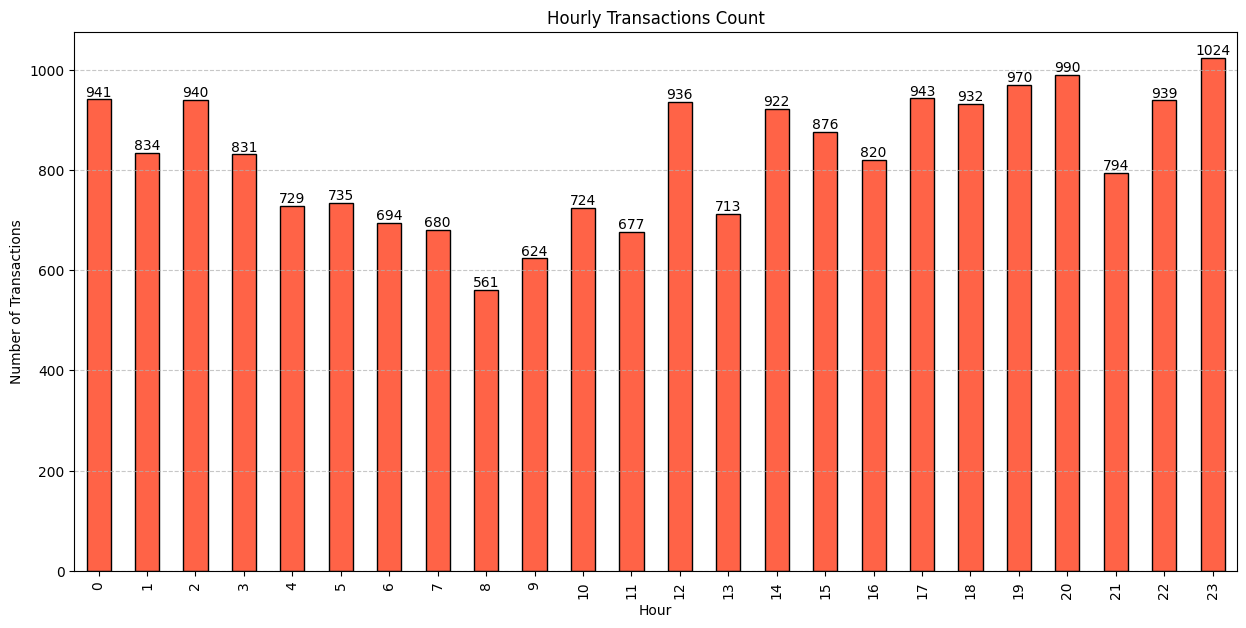

In [ ]:
plt.figure(figsize = (15,7))
hourly_transactions = data.groupby('hour')['Transaction Hash'].count()
hourly_transactions.plot(kind='bar', color='tomato', edgecolor = "k")
plt.title('Hourly Transactions Count')
plt.ylabel('Number of Transactions')
plt.xlabel('Hour')
for i, count in enumerate(hourly_transactions):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Weekend vs. Weekday transactions

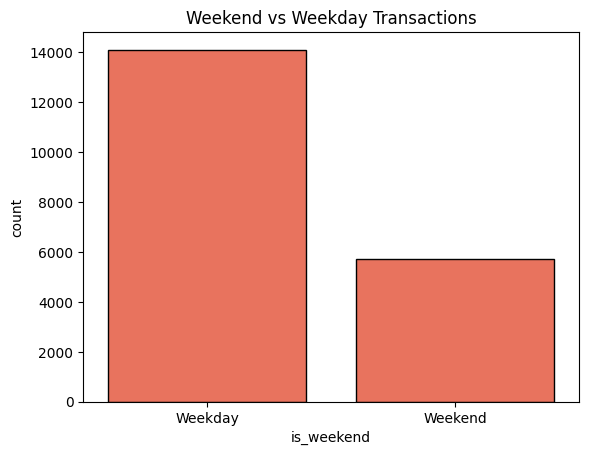

In [ ]:
sns.countplot(data=data, x='is_weekend' , color = "tomato" , edgecolor = "k")
plt.title('Weekend vs Weekday Transactions')
plt.xticks([0, 1], ['Weekday', 'Weekend'])
plt.show()

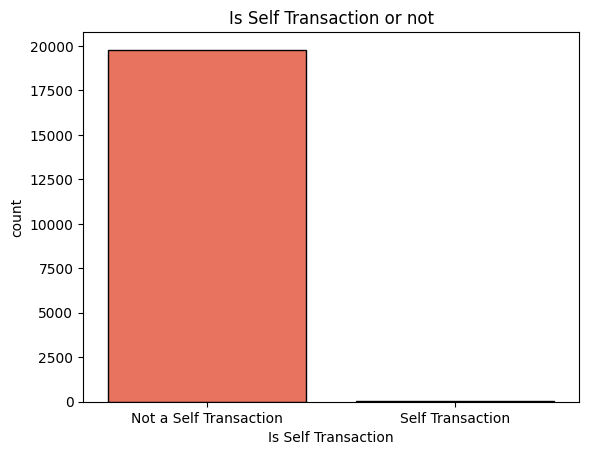

In [ ]:
sns.countplot(data=data, x='Is Self Transaction' , color = "tomato" , edgecolor = "k")
plt.title('Is Self Transaction or not')
plt.xticks([0, 1], ['Not a Self Transaction', 'Self Transaction'])
plt.show()

In [ ]:
#data.to_csv("processed_near_token_data.csv", index=False)
#this processed dataset in Group2/Dataset folder

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19829 entries, 13 to 10613
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Transaction Hash             19829 non-null  object        
 1   Blockno                      19829 non-null  int64         
 2   UnixTimestamp                19829 non-null  int64         
 3   DateTime (UTC)               19829 non-null  datetime64[ns]
 4   From                         19829 non-null  object        
 5   To                           19829 non-null  object        
 6   Quantity                     19829 non-null  float64       
 7   Method                       19829 non-null  object        
 8   Z-Score                      19829 non-null  float64       
 9   month                        19829 non-null  int32         
 10  date                         19829 non-null  int32         
 11  hour                         19829 non-null  

# **Sprint 2**

Convert Categorical Columns to Numerical

In [ ]:
# Transforming 'hour' and 'month' feature into sine and cosine representation to handle its cyclical nature
data["hour_sin"] = np.sin(2 * np.pi * data["hour"] / 24)
data["hour_cos"] = np.cos(2 * np.pi * data["hour"] / 24)
data["month_sin"] = np.sin(2 * np.pi * data["month"] / 12)
data["month_cos"] = np.cos(2 * np.pi * data["month"] / 12)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Converting Categorical column into binary
categorical_columns = ['is_weekend', 'High Quantity Flag', 'Is Self Transaction', 'Is Outlier']
for col in categorical_columns:
    data[col] = data[col].astype(int)

label_encoder = LabelEncoder()
categorical_to_encode = ['day_of_week', 'Method', 'Quantity Category']
for col in categorical_to_encode:
    data[col] = label_encoder.fit_transform(data[col])


Standardize the Data

In [ ]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns for standardization
numerical_columns = [
    'Quantity', 'Log Quantity','Z-Score','From Activity Count',
    'To Activity Count', 'Cumulative Quantity',
    'from_degree_centrality', 'from_betweenness_centrality',
    'from_closeness_centrality', 'to_degree_centrality',
    'to_betweenness_centrality', 'to_closeness_centrality',
    'date', 'month'
]

scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])


In [ ]:
# Define the feature columns
features = [
    'Quantity', 'Log Quantity','Z-Score','From Activity Count',
    'To Activity Count', 'Cumulative Quantity','High Quantity Flag',
    'Is Self Transaction', 'Is Outlier','hour_sin',
    'hour_cos','month_sin','month_cos',
    'is_weekend','from_degree_centrality',
    'from_betweenness_centrality',
    'from_closeness_centrality', 'to_degree_centrality',
    'to_betweenness_centrality', 'to_closeness_centrality'
]

# Extract the features for modeling
X = data[features]

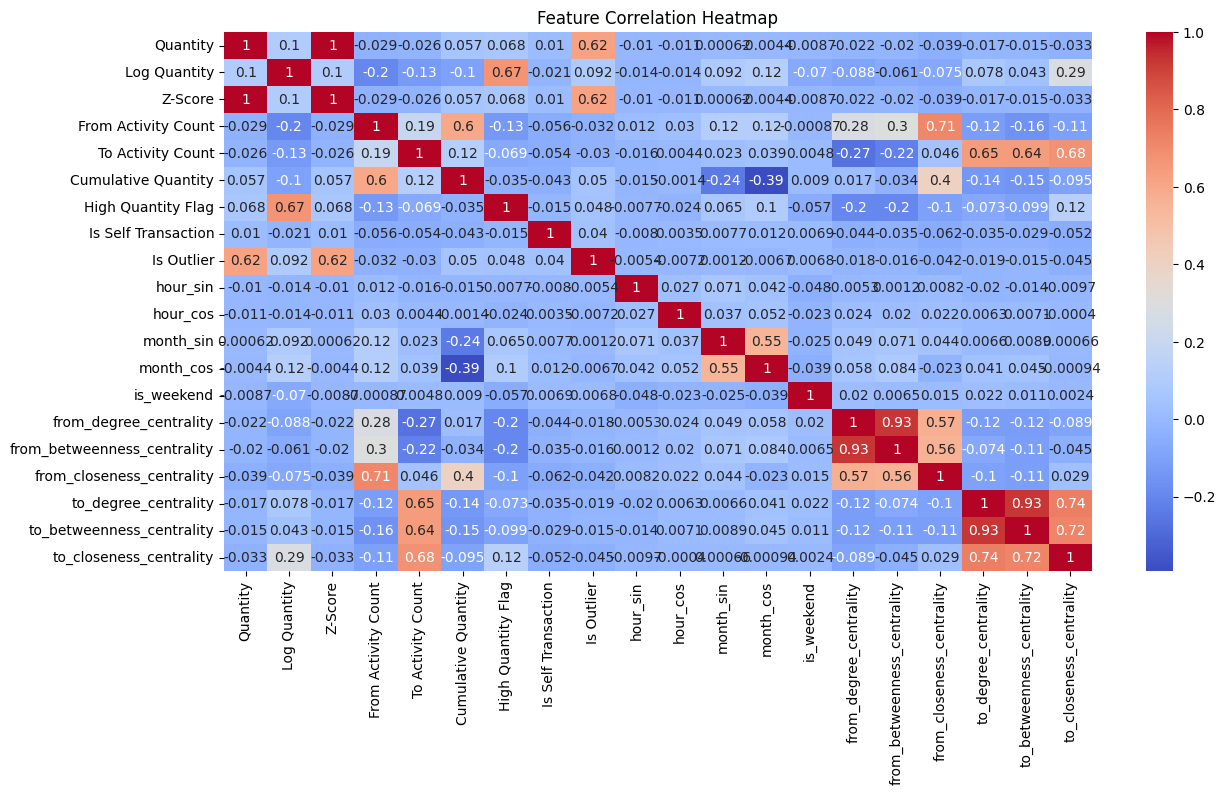

In [ ]:
plt.figure(figsize=(14,7))
sns.heatmap(data[features].corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


## **Isolation forest for anomalies detection**





Train the Isolation Forest Model

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize the Isolation Forest
iso_forest = IsolationForest(
    n_estimators=100,
    max_samples='auto',
    contamination=0.05,
    random_state=42
)

# Fit the model on the dataset
iso_forest.fit(X_scaled)

# Predict anomalies (-1: anomaly, 1: normal)
data['isolation_anomaly'] = iso_forest.predict(X)


Visualize Anomalies

In [ ]:
#Anomaly Distribution
print(data['isolation_anomaly'].value_counts())


isolation_anomaly
 1    19174
-1      655
Name: count, dtype: int64


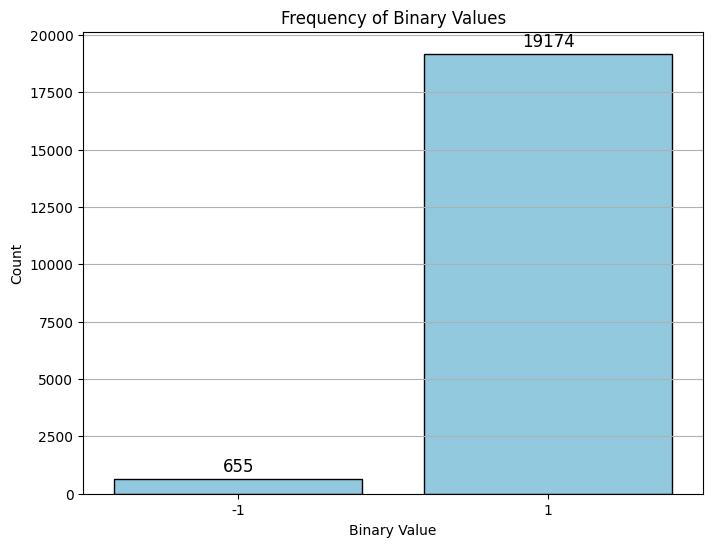

In [ ]:
plt.figure(figsize=(8, 6))

ax = sns.countplot(x='isolation_anomaly', data=data, color='skyblue', edgecolor='black')
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',  # Get the count
        (p.get_x() + p.get_width() / 2., p.get_height()),  # Position text in the middle of the bar
        ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points'
    )

plt.title('Frequency of Binary Values')
plt.xlabel('Binary Value')
plt.ylabel('Count')
plt.grid(True, axis='y')
plt.show()


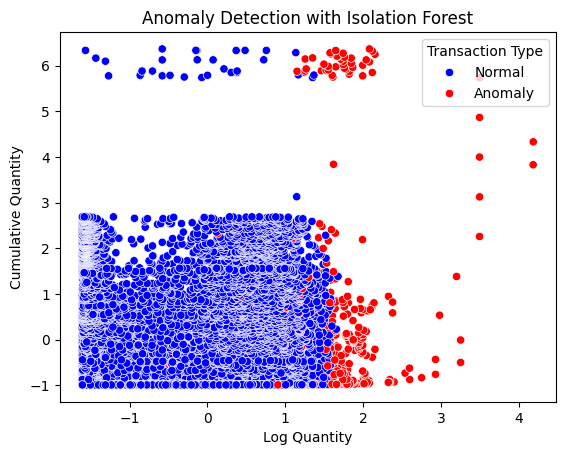

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot anomalies vs normal transactions
sns.scatterplot(
    x=data['Log Quantity'], y=data['Cumulative Quantity'],
    hue=data['isolation_anomaly'].map({-1: 'Anomaly', 1: 'Normal'}),
    hue_order=['Normal', 'Anomaly'],
    palette=['blue', 'red']
)
plt.title("Anomaly Detection with Isolation Forest")
plt.xlabel("Log Quantity")
plt.ylabel("Cumulative Quantity")
plt.legend(title="Transaction Type")
plt.show()


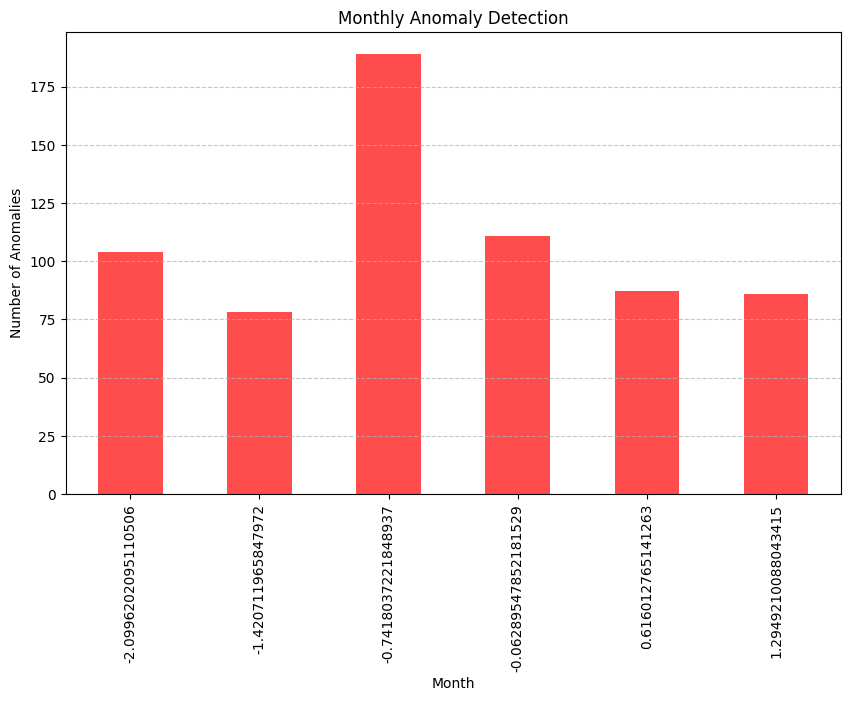

In [ ]:
import matplotlib.pyplot as plt

# Group by month and count anomalies
monthly_anomalies = data[data['isolation_anomaly'] == -1].groupby('month').size()

# Plot monthly anomalies
plt.figure(figsize=(10, 6))
monthly_anomalies.plot(kind='bar', color='red', alpha=0.7)
plt.title("Monthly Anomaly Detection")
plt.xlabel("Month")
plt.ylabel("Number of Anomalies")
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


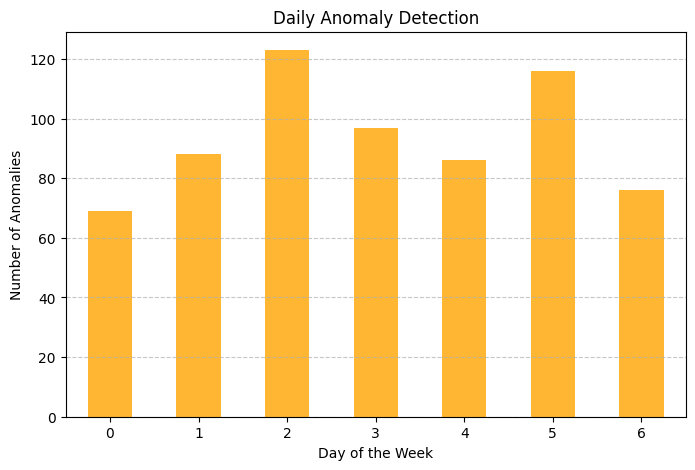

In [ ]:
# Group by day_of_week and count anomalies
daily_anomalies = data[data['isolation_anomaly'] == -1].groupby('day_of_week').size()

# Plot daily anomalies
plt.figure(figsize=(8, 5))
daily_anomalies.plot(kind='bar', color='orange', alpha=0.8)
plt.title("Daily Anomaly Detection")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Anomalies")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


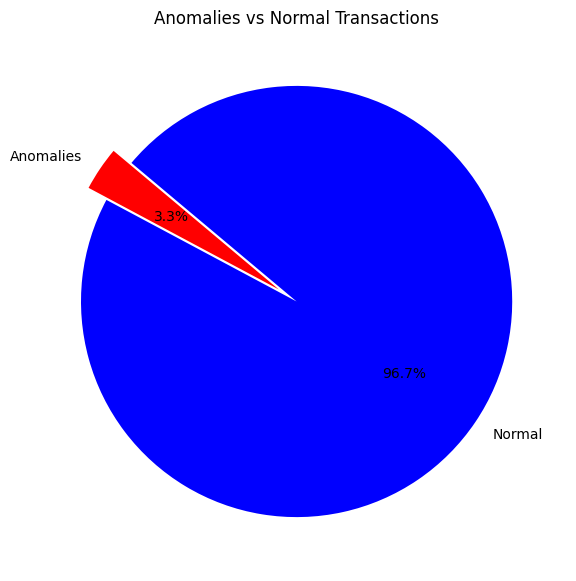

In [ ]:
# Calculate anomaly percentage
total_transactions = len(data)
anomaly_count = (data['isolation_anomaly'] == -1).sum()
normal_count = total_transactions - anomaly_count

# Pie chart
plt.figure(figsize=(7, 7))
plt.pie(
    [anomaly_count, normal_count],
    labels=['Anomalies', 'Normal'],
    autopct='%1.1f%%',
    colors=['red', 'blue'],
    startangle=140,
    explode=(0.1, 0)
)
plt.title("Anomalies vs Normal Transactions")
plt.show()


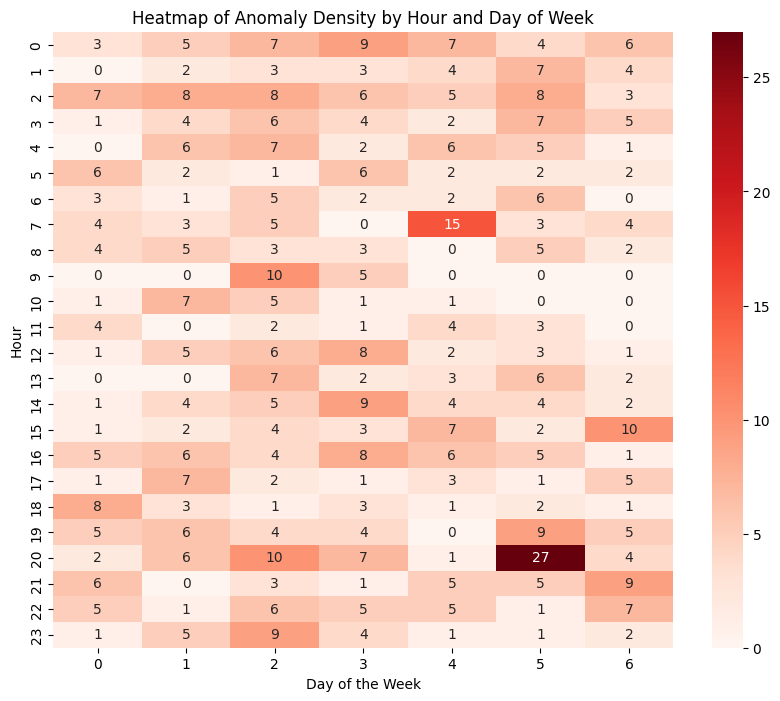

In [ ]:
import seaborn as sns

# Create a pivot table for heatmap
heatmap_data = data[data['isolation_anomaly'] == -1].pivot_table(
    index='hour', columns='day_of_week', values='isolation_anomaly', aggfunc='count', fill_value=0
)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap="Reds", annot=True, fmt='d')
plt.title("Heatmap of Anomaly Density by Hour and Day of Week")
plt.xlabel("Day of the Week")
plt.ylabel("Hour")
plt.show()


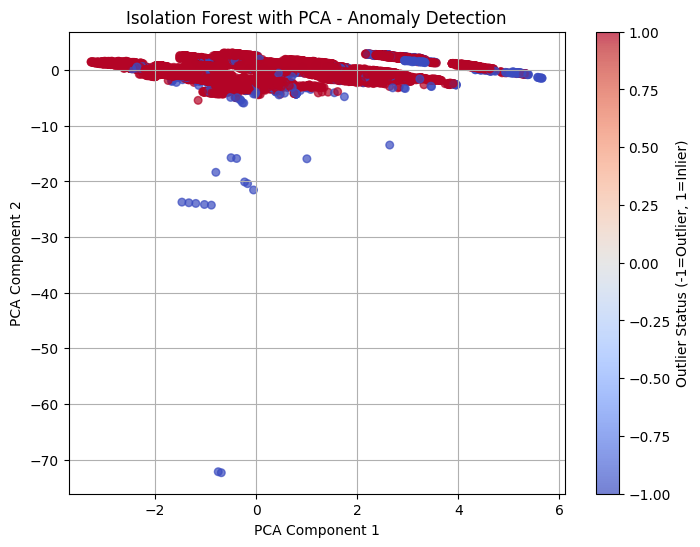

In [ ]:
from sklearn.decomposition import PCA

# Applying PCA Algo to reduce dimensions to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Creating a scatter plot of the PCA-transformed data
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['isolation_anomaly'], cmap='coolwarm', s=30, alpha=0.7)

plt.title('Isolation Forest with PCA - Anomaly Detection')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

plt.colorbar(label='Outlier Status (-1=Outlier, 1=Inlier)')
plt.grid(True)
plt.show()


# **Local Outlier Factor**

### Train LOF

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors = 20 , metric = 'euclidean' , contamination = 0.02)

predictions = lof.fit_predict(X_scaled)

anomaly_scores = lof.negative_outlier_factor_

data['lof_scores'] = anomaly_scores
data['lof_outliers'] = predictions


In [ ]:
outlier_count = (data['lof_outliers'] == -1).sum()
print(f"Number of outliers detected: {outlier_count}")


Number of outliers detected: 397


### Visualize and Detecting Anomalies

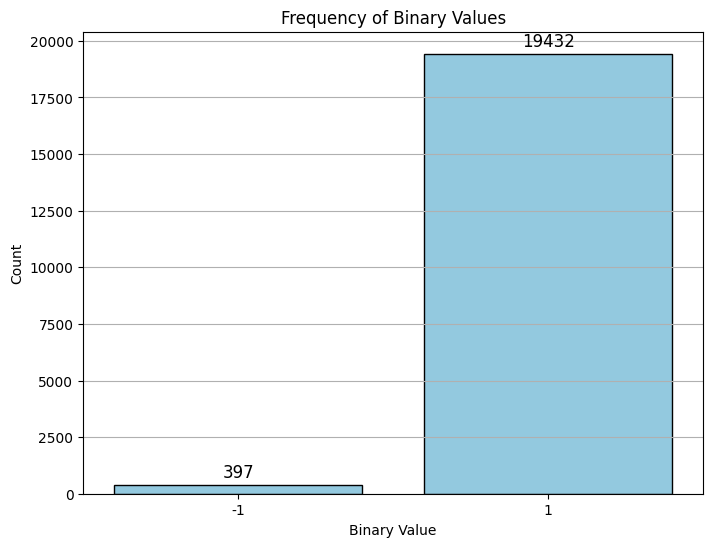

In [ ]:
plt.figure(figsize=(8, 6))

ax = sns.countplot(x='lof_outliers', data=data, color='skyblue', edgecolor='black')
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points'
    )
plt.title('Frequency of Binary Values')
plt.xlabel('Binary Value')
plt.ylabel('Count')
plt.grid(True, axis='y')
plt.show()


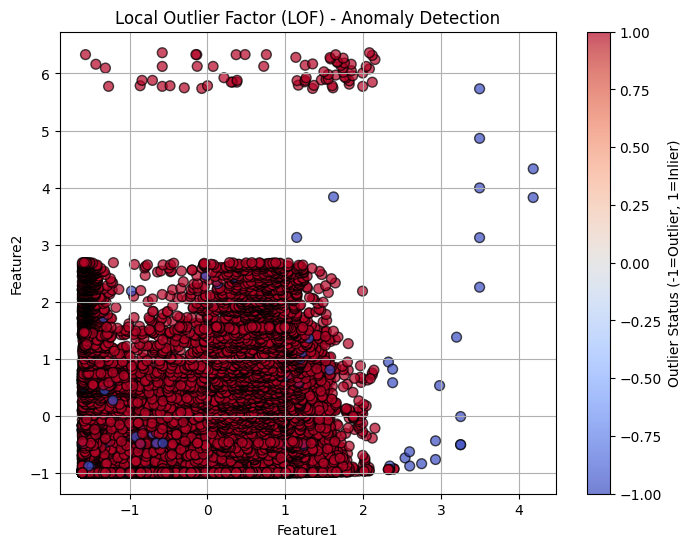

In [ ]:
plt.figure(figsize=(8, 6))

# Plot inliers (1) and outliers (-1) with different colors
plt.scatter(data['Log Quantity'], data['Cumulative Quantity'], c=data['lof_outliers'], cmap='coolwarm', edgecolor='k', s=50, alpha=0.7)
plt.title('Local Outlier Factor (LOF) - Anomaly Detection')
plt.xlabel('Feature1')
plt.ylabel('Feature2')

# Display the colorbar for outlier status
plt.colorbar(label='Outlier Status (-1=Outlier, 1=Inlier)')
plt.grid(True)
plt.show()


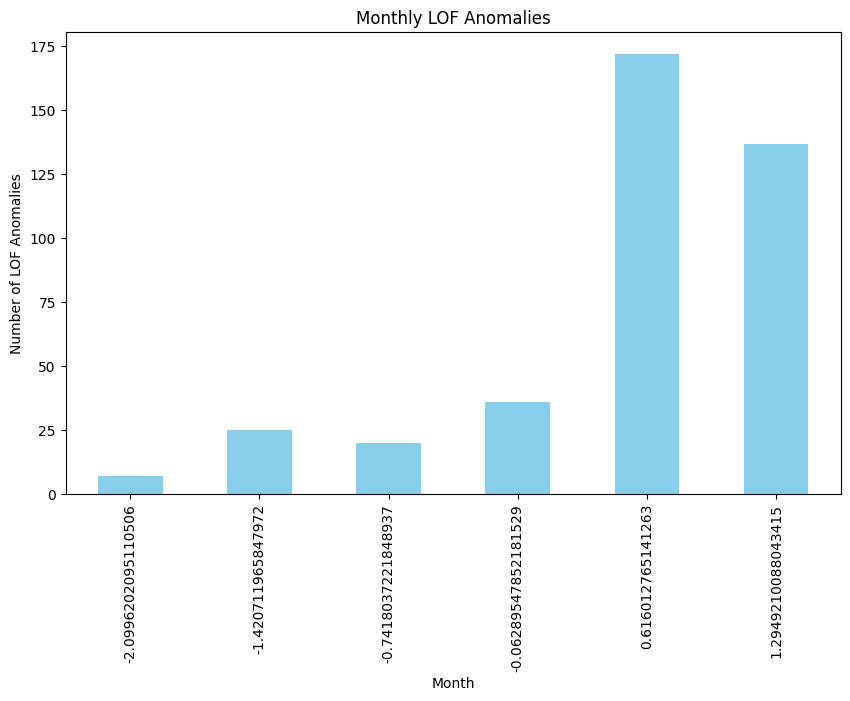

In [ ]:
 # Group by month and count LOF anomalies
monthly_lof_anomalies = data[data['lof_outliers'] == -1].groupby('month').size()

# Plot monthly LOF anomalies
plt.figure(figsize=(10, 6))
monthly_lof_anomalies.plot(kind='bar', color='skyblue')
plt.title("Monthly LOF Anomalies")
plt.xlabel("Month")
plt.ylabel("Number of LOF Anomalies")
plt.xticks(rotation=90)
plt.show()

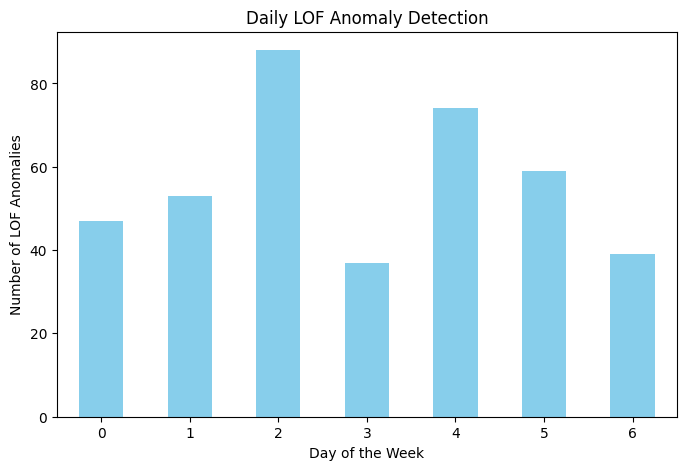

In [ ]:
# Group by day_of_week and count LOF anomalies
daily_lof_anomalies = data[data['lof_outliers'] == -1].groupby('day_of_week').size()

# Plot daily LOF anomalies
plt.figure(figsize=(8, 5))
daily_lof_anomalies.plot(kind='bar', color='skyblue')
plt.title("Daily LOF Anomaly Detection")
plt.xlabel("Day of the Week")
plt.ylabel("Number of LOF Anomalies")
plt.xticks(rotation=0)
plt.show()

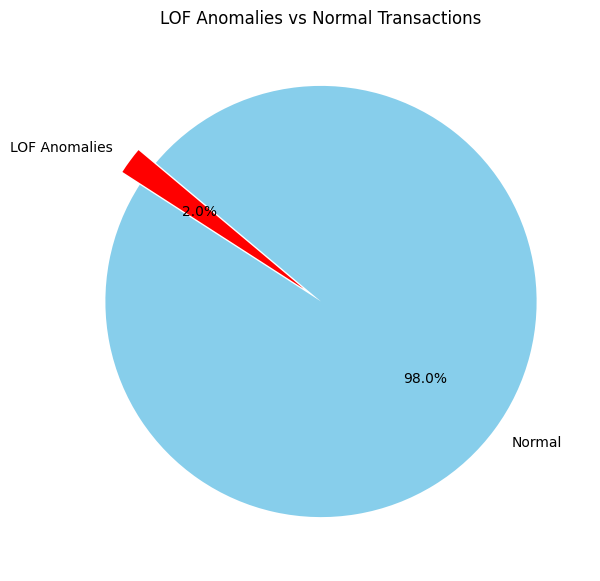

In [ ]:
# Calculate anomaly percentage for LOF
total_transactions = len(data)
lof_anomaly_count = (data['lof_outliers'] == -1).sum()
lof_normal_count = total_transactions - lof_anomaly_count

# Pie chart for LOF
plt.figure(figsize=(7, 7))
plt.pie(
    [lof_anomaly_count, lof_normal_count],
    labels=['LOF Anomalies', 'Normal'],
    autopct='%1.1f%%',
    colors=['red', 'skyblue'],
    startangle=140,
    explode=(0.1, 0)
)
plt.title("LOF Anomalies vs Normal Transactions")
plt.show()

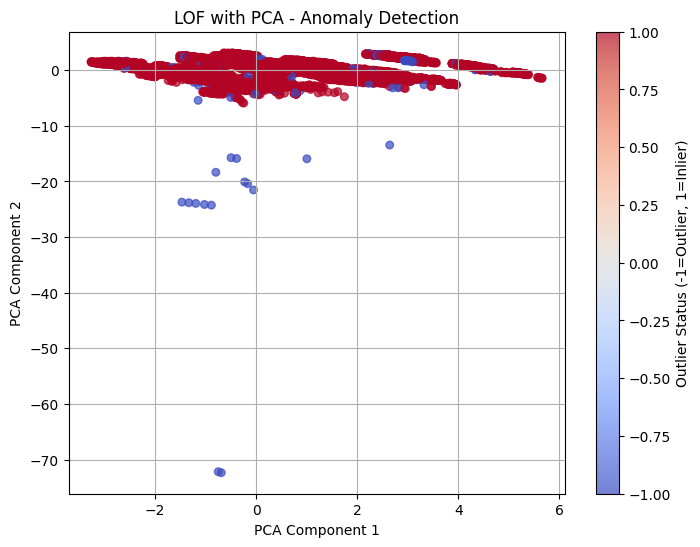

In [ ]:
from sklearn.decomposition import PCA

# Applying PCA to reduce dimensions to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['lof_outliers'], cmap='coolwarm', s=30, alpha=0.7)

plt.title('LOF with PCA - Anomaly Detection')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

plt.colorbar(label='Outlier Status (-1=Outlier, 1=Inlier)')
plt.grid(True)
plt.show()


# **One Class SVM**

### Train SVM

In [ ]:
from sklearn.svm import OneClassSVM

# Initialize and fit One-Class SVM
ocsvm = OneClassSVM(kernel='rbf', gamma='scale', nu=0.05)
ocsvm.fit(X_scaled)

data['ocsvm_anomaly'] = ocsvm.predict(X_scaled)

In [ ]:
# Add anomaly scores
anomaly_scores = ocsvm.decision_function(X_scaled)
data['ocsvm_scores'] = anomaly_scores

# Count anomalies
anomaly_count = (data['ocsvm_anomaly'] == -1).sum()
print(f"Number of anomalies detected: {anomaly_count}")


Number of anomalies detected: 993


### Visualize and Detecting Anomalies

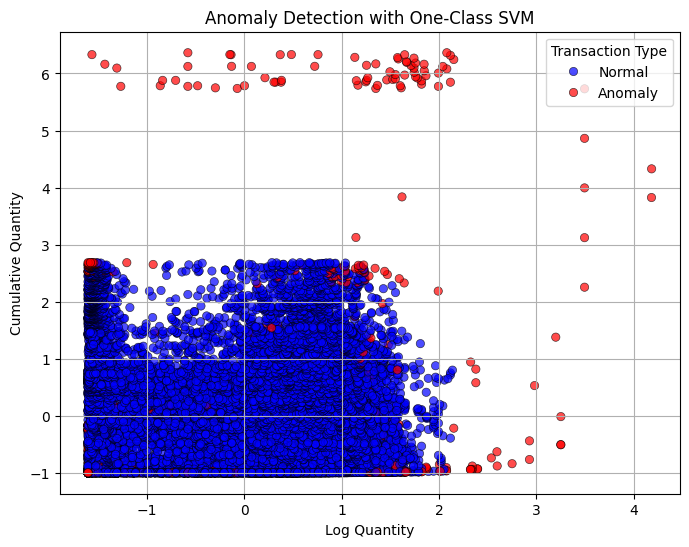

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=data['Log Quantity'], y=data['Cumulative Quantity'],
    hue=data['ocsvm_anomaly'].map({-1: 'Anomaly', 1: 'Normal'}),
    hue_order=['Normal', 'Anomaly'],
    palette=['blue', 'red'],
    edgecolor='k', alpha=0.7
)
plt.title("Anomaly Detection with One-Class SVM")
plt.xlabel("Log Quantity")
plt.ylabel("Cumulative Quantity")
plt.legend(title="Transaction Type")
plt.grid(True)
plt.show()

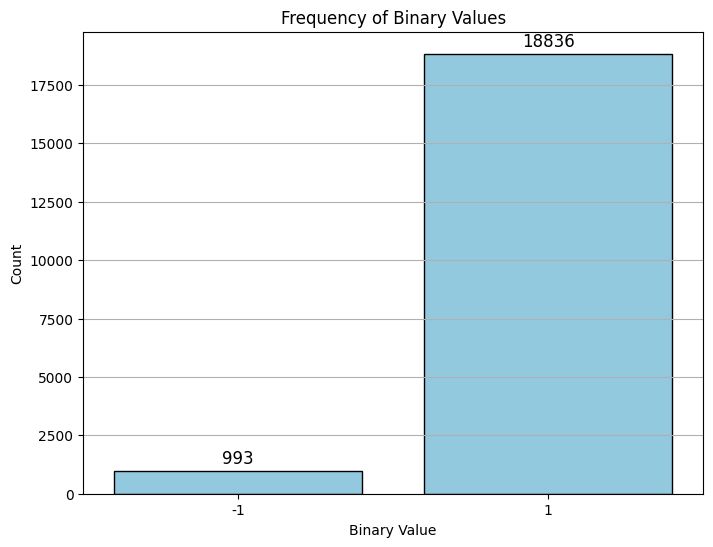

In [ ]:
plt.figure(figsize=(8, 6))

ax = sns.countplot(x='ocsvm_anomaly', data=data, color='skyblue', edgecolor='black')
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points'
    )

plt.title('Frequency of Binary Values')
plt.xlabel('Binary Value')
plt.ylabel('Count')
plt.grid(True, axis='y')
plt.show()

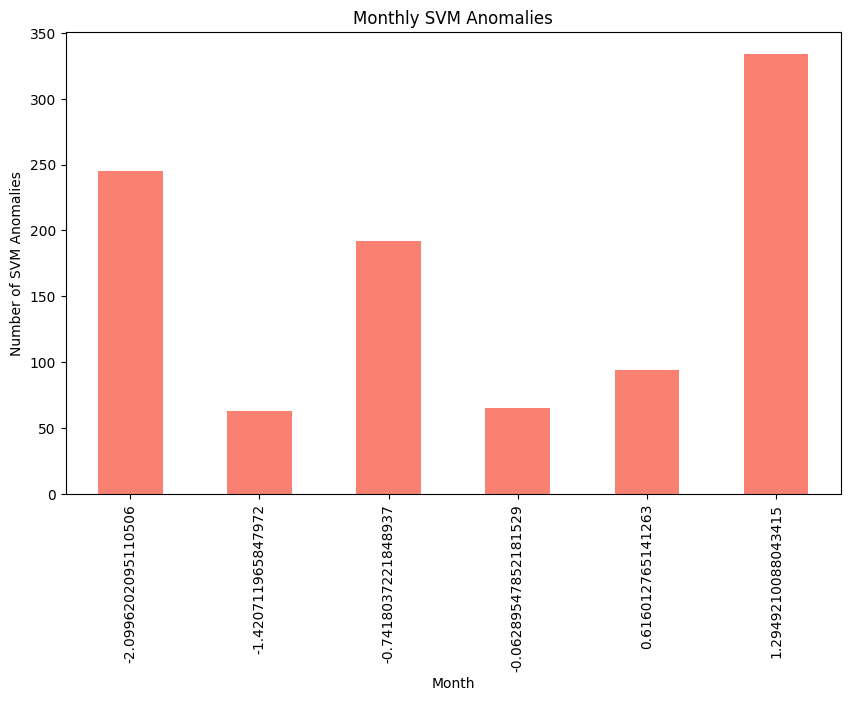

In [ ]:
# Group by month and count SVM anomalies
monthly_svm_anomalies = data[data['ocsvm_anomaly'] == -1].groupby('month').size()

# Plot monthly SVM anomalies
plt.figure(figsize=(10, 6))
monthly_svm_anomalies.plot(kind='bar', color='salmon')
plt.title("Monthly SVM Anomalies")
plt.xlabel("Month")
plt.ylabel("Number of SVM Anomalies")
plt.xticks(rotation=90)
plt.show()

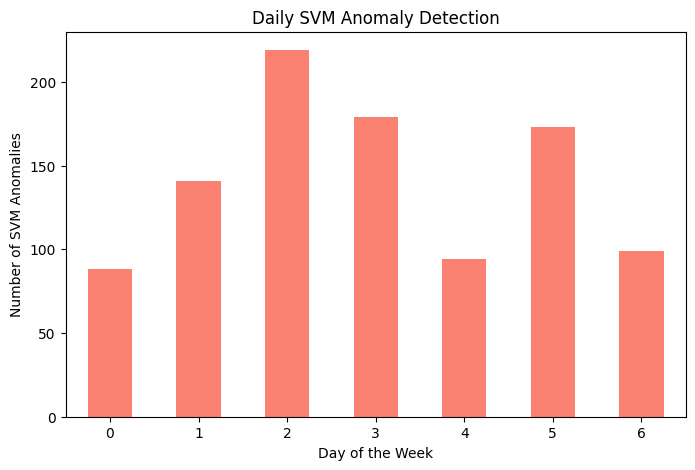

In [ ]:
# Group by day_of_week and count SVM anomalies
daily_svm_anomalies = data[data['ocsvm_anomaly'] == -1].groupby('day_of_week').size()

# Plot daily SVM anomalies
plt.figure(figsize=(8, 5))
daily_svm_anomalies.plot(kind='bar', color='salmon')
plt.title("Daily SVM Anomaly Detection")
plt.xlabel("Day of the Week")
plt.ylabel("Number of SVM Anomalies")
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.show()

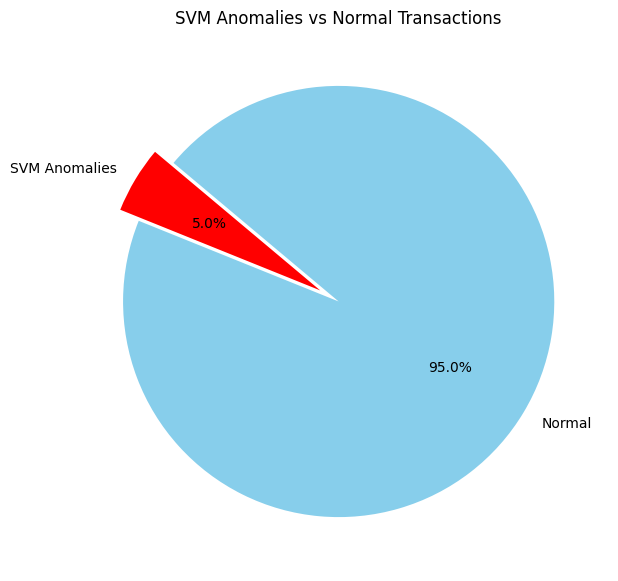

In [ ]:
# Calculate anomaly percentage for SVM
total_transactions = len(data)
svm_anomaly_count = (data['ocsvm_anomaly'] == -1).sum()
svm_normal_count = total_transactions - svm_anomaly_count

# Pie chart for SVM
plt.figure(figsize=(7, 7))
plt.pie(
    [svm_anomaly_count, svm_normal_count],
    labels=['SVM Anomalies', 'Normal'],
    autopct='%1.1f%%',
    colors=['red', 'skyblue'],
    startangle=140,
    explode=(0.1, 0)
)
plt.title("SVM Anomalies vs Normal Transactions")
plt.show()

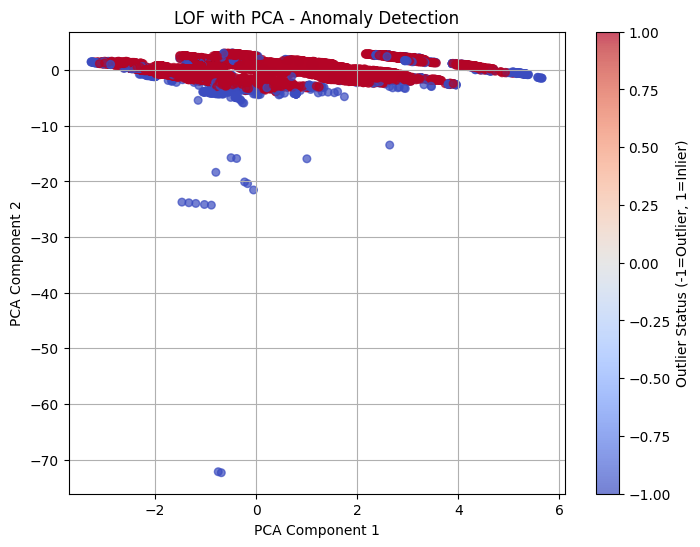

In [ ]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensions to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['ocsvm_anomaly'], cmap='coolwarm', s=30, alpha=0.7)

plt.title('LOF with PCA - Anomaly Detection')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

plt.colorbar(label='Outlier Status (-1=Outlier, 1=Inlier)')
plt.grid(True)
plt.show()


# **Comparison between models in detecting Anomaly**

> Add blockquote




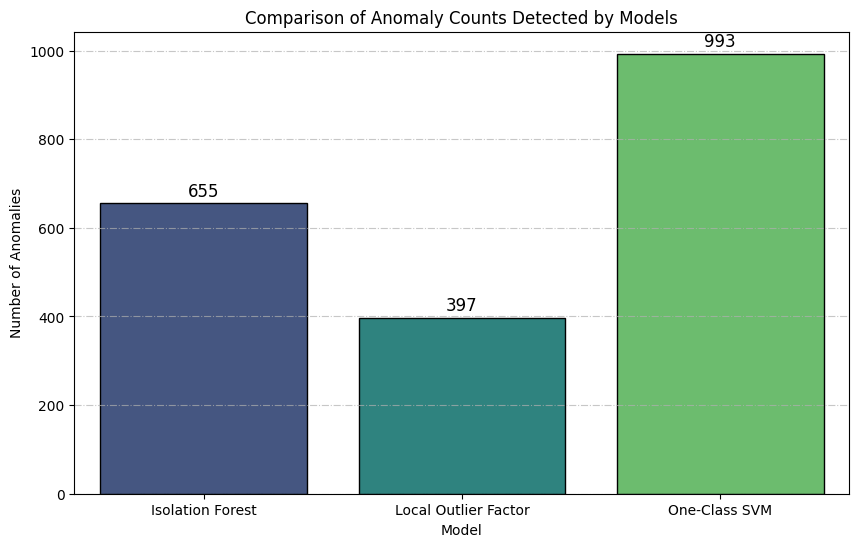

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Calculate anomaly counts
anomaly_counts = pd.DataFrame({
    'Model': ['Isolation Forest', 'Local Outlier Factor', 'One-Class SVM'],
    'Anomalies': [
        (data['isolation_anomaly'] == -1).sum(),
        (data['lof_outliers'] == -1).sum(),
        (data['ocsvm_anomaly'] == -1).sum()
    ]
})

# Plot anomaly counts
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Model', y='Anomalies', data=anomaly_counts, palette='viridis', edgecolor='k')

# Add counts on top of each bar
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points'
    )


plt.title('Comparison of Anomaly Counts Detected by Models')
plt.ylabel('Number of Anomalies')
plt.xlabel('Model')
plt.grid(axis='y', linestyle='-.', alpha=0.7)
plt.show()

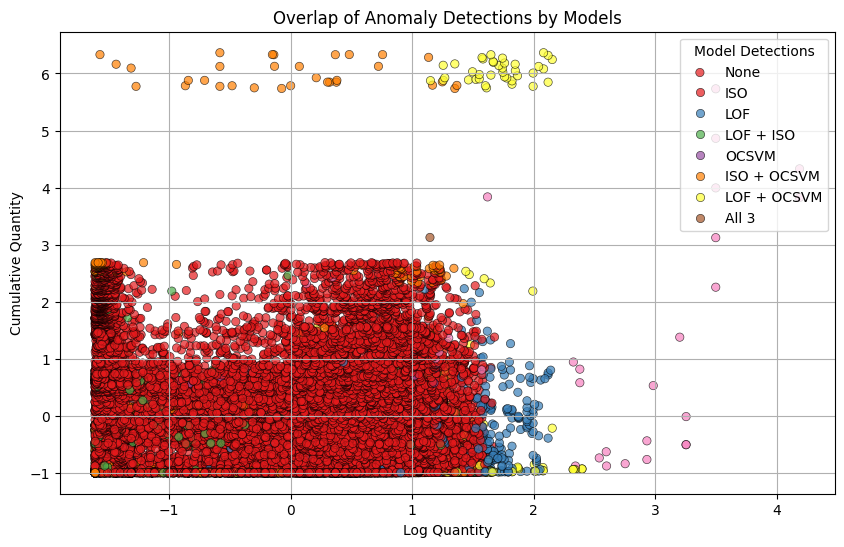

In [ ]:
# Visualize overlap between models
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=data['Log Quantity'], y=data['Cumulative Quantity'],
    hue=(data['isolation_anomaly'] == -1).astype(int) +  # Changed 'Anomaly' to 'isolation_anomaly'
         (data['lof_outliers'] == -1).astype(int) * 2 +
         (data['ocsvm_anomaly'] == -1).astype(int) * 4,
    palette='Set1', edgecolor='k', alpha=0.7
)
plt.title("Overlap of Anomaly Detections by Models")
plt.xlabel("Log Quantity")
plt.ylabel("Cumulative Quantity")
plt.legend(
    title="Model Detections",
    labels=[
        "None", "ISO", "LOF", "LOF + ISO",
        "OCSVM", "ISO + OCSVM", "LOF + OCSVM", "All 3"
    ],
    loc='upper right'
)
plt.grid(True)
plt.show()

## **Ensemble Voting**

### Applying Ensemble

In [ ]:
from scipy.stats import mode

# Here we are Converting labels to binary (1 for normal, 0 for anomaly)
models_labels = np.array([
    np.where(data['isolation_anomaly'] == 1, 1, 0),
    np.where(data['lof_outliers'] == 1, 1, 0),
    np.where(data['ocsvm_anomaly'] == 1, 1, 0)
])

# Ensemble voting
ensemble_labels = mode(models_labels, axis=0).mode.flatten()

data['ensemble_output'] = pd.DataFrame({
    'ensemble_labels': ensemble_labels
})

In [ ]:
# Calculate agreement scores
agreement_scores = np.mean(models_labels == ensemble_labels, axis=1)

# Model names for clarity
model_names = ['Isolation Forest', 'Local Outlier Factor', 'One-Class SVM']

# Print agreement scores
for model, score in zip(model_names, agreement_scores):
    print(f"{model} agreement with ensemble: {score:.2f}")


Isolation Forest agreement with ensemble: 0.98
Local Outlier Factor agreement with ensemble: 0.97
One-Class SVM agreement with ensemble: 0.97


Visualizing and Detecting Anomalies

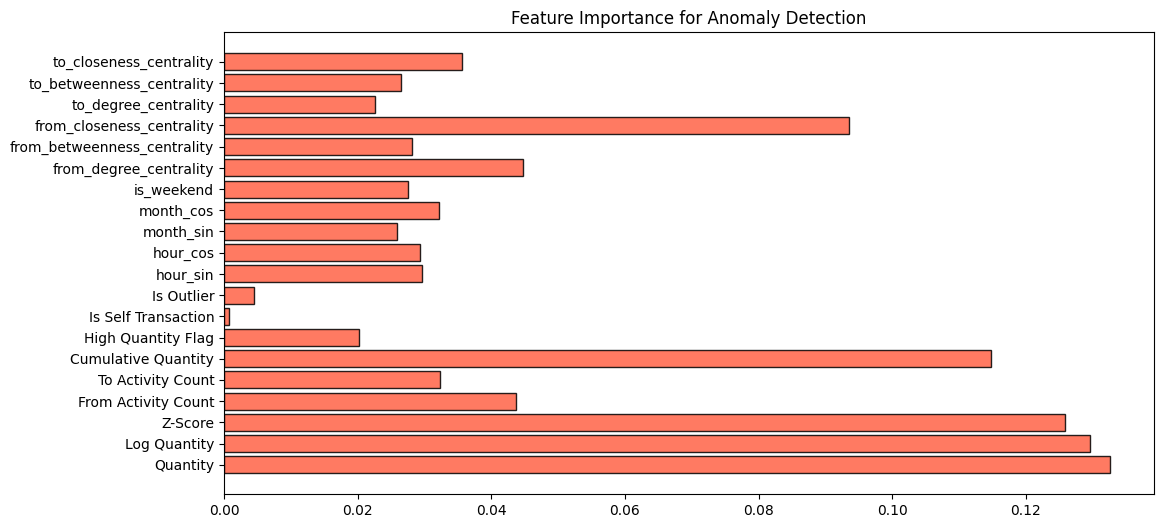

In [ ]:
## Visualizing the Feature Importance in Ensemble Voting

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(data[features], ensemble_labels)
importance = rf.feature_importances_

plt.figure(figsize=(12, 6))
plt.barh(features, importance , color = 'tomato' , alpha = 0.85 , edgecolor = 'k')
plt.title("Feature Importance for Anomaly Detection")
plt.show()


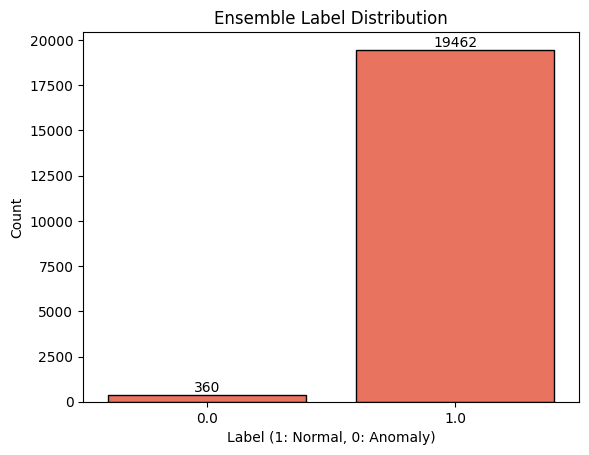

In [ ]:
## Countplot between Normal and Anomalous Data Points
sns.countplot(x=data['ensemble_output'] , color = 'tomato' , edgecolor = 'k')
plt.title("Ensemble Label Distribution")
plt.xlabel("Label (1: Normal, 0: Anomaly)")
plt.ylabel("Count")
for bar in plt.gca().patches:
    count = int(bar.get_height())
    x = bar.get_x() + bar.get_width() / 2
    plt.text(x, count + 0.1, str(count), ha='center', va='bottom' )

plt.show()


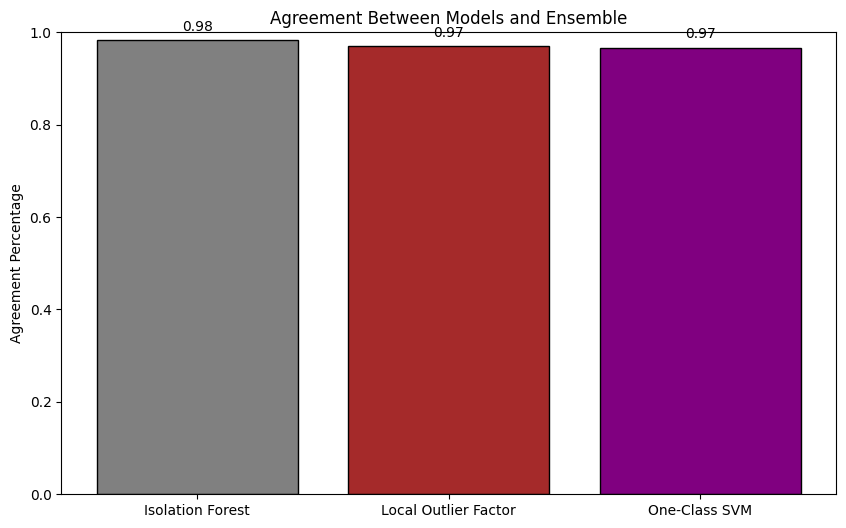

In [ ]:
agreement = np.mean(models_labels == ensemble_labels, axis=1)

plt.figure(figsize=(10, 6))
models = ['Isolation Forest', 'Local Outlier Factor', 'One-Class SVM']
plt.bar(models, agreement, color=['grey', 'brown', 'purple'] , edgecolor= 'k')
plt.title("Agreement Between Models and Ensemble")
plt.ylabel("Agreement Percentage")
plt.ylim(0, 1)
for i, value in enumerate(agreement):
    plt.text(i, value + 0.02, f"{value:.2f}", ha='center', fontsize=10)

plt.show()


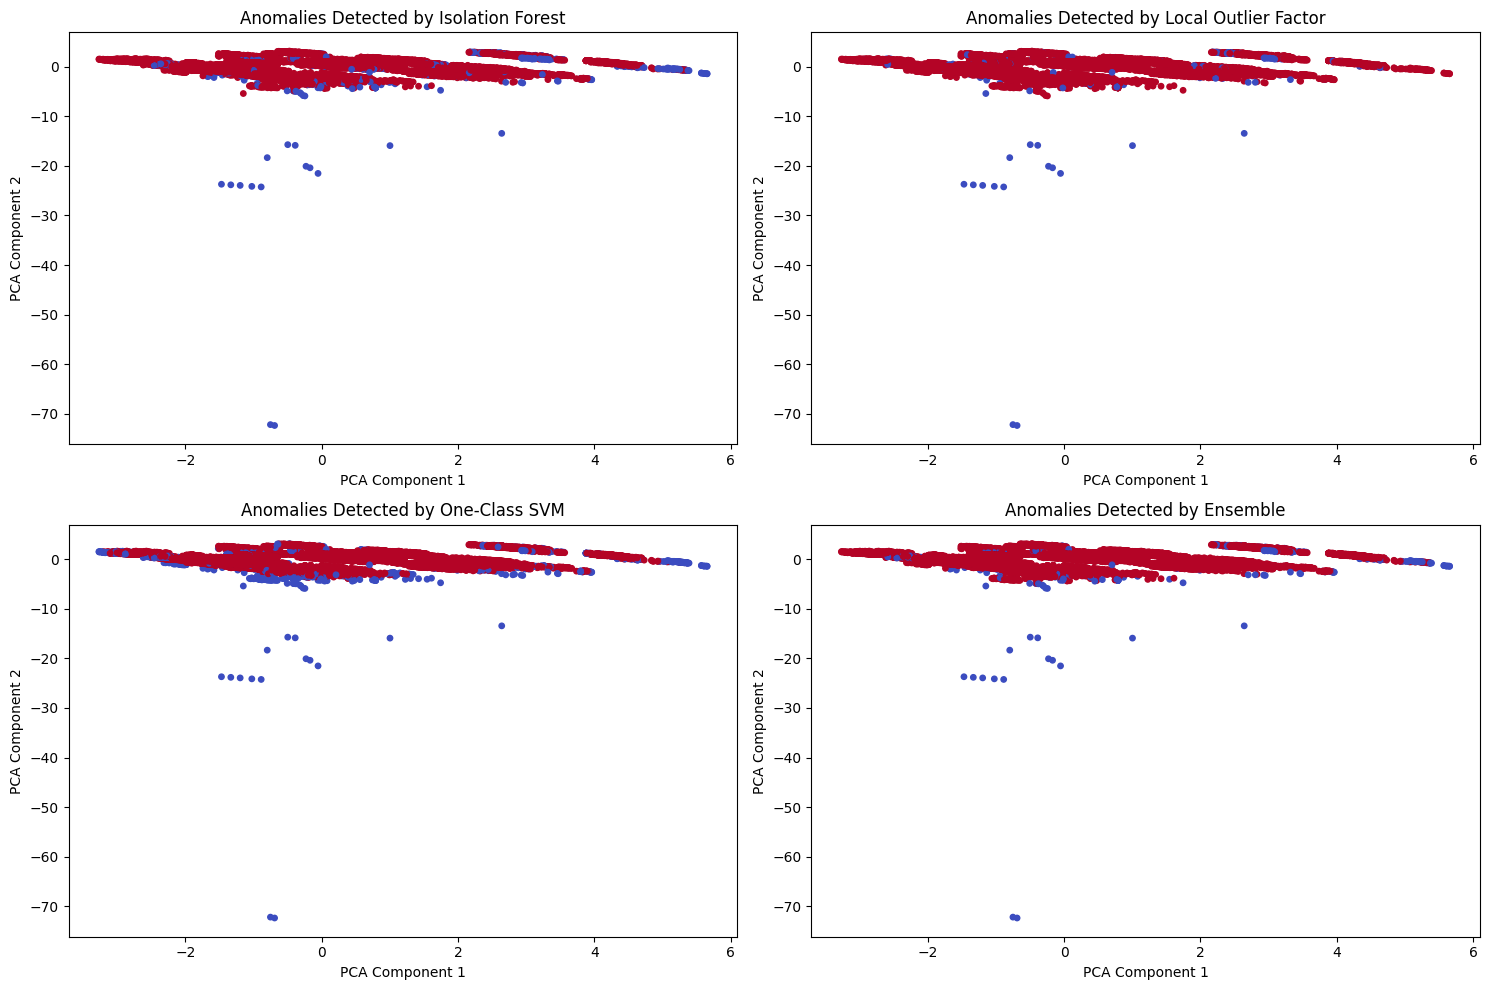

In [ ]:
from sklearn.decomposition import PCA

# Reduce data to 2D for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X_scaled)

# Plot anomalies for each model and the ensemble
plt.figure(figsize=(15, 10))
models = ['Isolation Forest', 'Local Outlier Factor', 'One-Class SVM', 'Ensemble']
for i, model_labels in enumerate(list(models_labels) + [ensemble_labels]):
    plt.subplot(2, 2, i + 1)
    plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=model_labels, cmap='coolwarm', s=15)
    plt.title(f"Anomalies Detected by {models[i]}")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
plt.tight_layout()
plt.show()


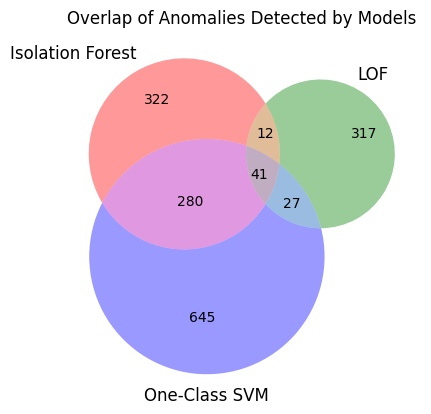

In [ ]:
from matplotlib_venn import venn3

# Convert model labels to binary sets for Venn diagram
if_anomalies = set(np.where(models_labels[0] == 0)[0])
lof_anomalies = set(np.where(models_labels[1] == 0)[0])
oc_anomalies = set(np.where(models_labels[2] == 0)[0])
ensemble_anomalies = set(np.where(ensemble_labels == 0)[0])

# Venn Diagram
venn3([if_anomalies, lof_anomalies, oc_anomalies], ('Isolation Forest', 'LOF', 'One-Class SVM'))
plt.title("Overlap of Anomalies Detected by Models")
plt.show()


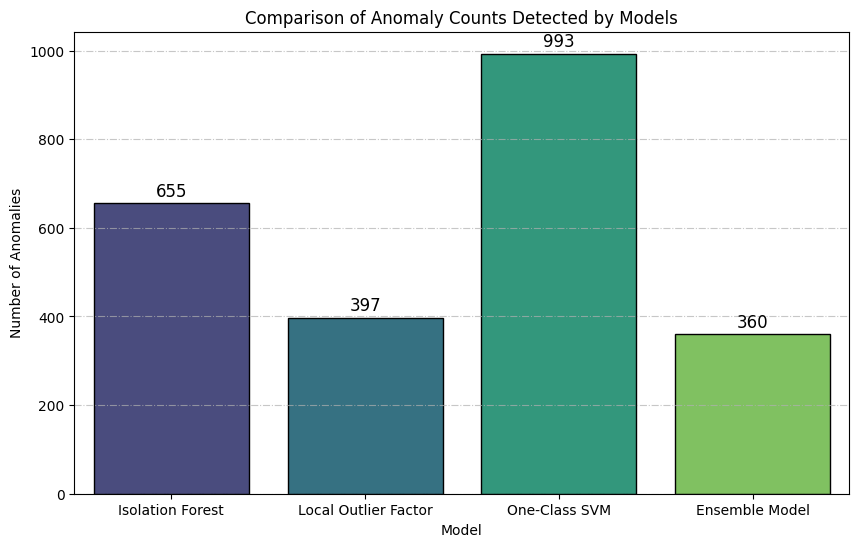

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Calculate anomaly counts
anomaly_counts = pd.DataFrame({
    'Model': ['Isolation Forest', 'Local Outlier Factor', 'One-Class SVM',"Ensemble Model"],
    'Anomalies': [
        (data['isolation_anomaly'] == -1).sum(),  # Replace 'Anomaly' with 'isolation_anomaly'
        (data['lof_outliers'] == -1).sum(),
        (data['ocsvm_anomaly'] == -1).sum(),
        (data['ensemble_output'] == 0).sum()

    ]
})

# Plot anomaly counts
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Model', y='Anomalies', data=anomaly_counts, palette='viridis', edgecolor='k')

# Add counts on top of each bar
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points'
    )


plt.title('Comparison of Anomaly Counts Detected by Models')
plt.ylabel('Number of Anomalies')
plt.xlabel('Model')
plt.grid(axis='y', linestyle='-.', alpha=0.7)
plt.show()